# M2.851 Tipología y ciclo de vida de los datos - UOC

# Práctica 2. Limpieza y validación de los datos

&nbsp;
&nbsp;

## 11/06/2018

## Alberto Gómez (agomezma@uoc.edu)

&nbsp;
&nbsp;

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
Introducción
</h1>
<br>
</div>

En este *notebook*  se desarrolla la práctica 2 de limpieza y validación de datos de la asignatura **Tipología y ciclo de vida de los datos**.

Se ha elegido uno de los dataset propuestos, Red Wine Quality.

El desarrollo se ha hecho en un *notebook* de Jupyter con un *kernel* de R. (También se proporciona un fichero HTML con el desarrollo y el código en R exportado.)

De esta forma, se integran, en un único documento, las respuestas a las preguntas planteadas en el enunciado con el código en R con el que se realiza el trabajo y los gráficos y tablas que sirven para explicar los resultados.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
1. Descripción del *dataset*
</h1>
<br>
</div>

Inicialmente se eligió el *dataset* de Red Wine Quality que se puede descargar de la siguiente dirección:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data


El *dataset* original está en https://archive.ics.uci.edu/ml/datasets/wine+quality y realmente está compuesto de dos conjuntos de datos: uno de vinos blancos y otro de vinos tintos.

Para que el problema de integración tuviera más interés se ha decidido partir de los dos conjuntos de datos y unificarlos. Desde el punto de vista del análisis de los datos, realmente no tiene sentido unirlos en un único conjunto, porque las características quimicas de ambos tipos de vino son distintas, como veremos en el apartado de análisis.

Ambos conjuntos tienen las mismas 11 variables, que representan distintas características físico-químicas de 6497 vinos portugueses:
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 

La variable de salida (12) es un valor entre 0 y 10 que representa la calidad (*quality*) del vino según un análisis sensorial:
12 - quality (score between 0 and 10) 

En este *dataset* no hay identificadores para los vinos. Como indican los autores del conjunto de datos en su descripción, las clases no están equilibradas (hay muchos más vinos normales que muy bueno o muy malos) y los datos aparecen ordenados por su calidad.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
1.1. Interés y objetivos del análisis 
</h3>
<br>
</div>

Este dataset es interesante para realizar pruebas de algoritmos de clasificación y predicción.

Sería muy útil poder predecir la calidad final del vino a partir de algunas de las características extraídas de un análisis químico. Además, también serviría para clasificar los vinos según sean sus características.

Con este conocimiento se podría, posteriormente, un productor de vinos podría actuar sobre la uva o sobre el proceso de vinificación para intentar obtener vinos de mejor calidad.

Los objetivos de este trabajo son:
- Conocer los datos de los data sets elegidos
- Integrarlos y limpiar los datos
- Hacer un análisis básico de los datos




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
1.2. Carga y resumen de los datos
</h3>
<br>
</div>

Con el siguiente código se cargan los dos ficheros en formato CSV que se pueden descargar desde el repositorio  https://archive.ics.uci.edu/ml/datasets/wine+quality.

Además, se muestran, para cada dataset cargado:
- número de registros
- número de campos
- nombre y tipo de los campos
- primeros datos 
- resumen de cada variable (máximo, mínimo, cuartiles, media y mediana)

En el resumen, si faltaran datos de alguna variable, aparecería el número de valores no disponibles.

In [1]:
# Los dos ficheros deben estar en el mismo directorio donde se ejecuta el código en R

# Carga del fichero de vinos blancos y resumen de datos
cat("VINOS BLANCOS \n")
cat("Fichero de datos: winequality-white.csv  \n")
whitewines = read.csv("winequality-white.csv", header = TRUE, sep=";")
cat("Número de registros, número de campos \n")
dim(whitewines)
cat("Tipos de los campos \n")
sapply(whitewines, function(x) class(x))
cat("Primeras filas \n")
head(whitewines)
cat("Resumen \n")
summary(whitewines)
cat("\n\n")

# Carga del fichero de vinos tintos y resumen de dato
cat("VINOS TINTOS \n")
cat("Fichero de datos: winequality-red.csv  \n")
redwines = read.csv("winequality-red.csv", header = TRUE, sep=";")
cat("Número de registros, número de campos \n")
dim(redwines)
cat("Tipos de los campos \n")
sapply(redwines, function(x) class(x))
cat("Primeras filas  \n")
head(redwines)
cat("Resumen \n")
summary(redwines)
cat("\n\n")


VINOS BLANCOS 
Fichero de datos: winequality-white.csv  
Número de registros, número de campos 


[1] 4898   12

Tipos de los campos 


fixed.acidity     volatile.acidity          citric.acid 
           "numeric"            "numeric"            "numeric" 
      residual.sugar            chlorides  free.sulfur.dioxide 
           "numeric"            "numeric"            "numeric" 
total.sulfur.dioxide              density                   pH 
           "numeric"            "numeric"            "numeric" 
           sulphates              alcohol              quality 
           "numeric"            "numeric"            "integer"

Primeras filas 


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


Resumen 


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   



VINOS TINTOS 
Fichero de datos: winequality-red.csv  
Número de registros, número de campos 


[1] 1599   12

Tipos de los campos 


fixed.acidity     volatile.acidity          citric.acid 
           "numeric"            "numeric"            "numeric" 
      residual.sugar            chlorides  free.sulfur.dioxide 
           "numeric"            "numeric"            "numeric" 
total.sulfur.dioxide              density                   pH 
           "numeric"            "numeric"            "numeric" 
           sulphates              alcohol              quality 
           "numeric"            "numeric"            "integer"

Primeras filas  


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Resumen 


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
2. Integración y selección de los datos de interés
</h1>
<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
2.1. Integración de los dos conjuntos de datos </h3>
<br>
</div>

Se van a unir ambos *datasets* en un único *data.frame*, añadiendo un campo **colour** que indique el tipo (color) del vino (0 para los blancos, 1 para los tintos).

Se podría haber añadido un código distinto o una cadena de texto para diferenciar el tipo de vino.

A continuación se puede ver el código para unificar los *datasets*, junto con un resumen de las características del nuevo conjunto.

En el nuevo conjunto quedan los vinos blancos al principio y los tintos, al final.

In [2]:
# Se añade el campo color (colour) a los dos dataframes: 0 para los vinos blancos, 1 para los tintos

cat("VINOS BLANCOS \n")
whitewines = cbind(colour = rep(0L,nrow(whitewines)), whitewines)
cat("Número de registros, número de campos \n")
dim(whitewines)
cat("Nombres de los campos \n")
names (whitewines)
cat("Tipos de los campos \n")
sapply(whitewines, function(x) class(x))

cat("VINOS TINTOS \n")
redwines = cbind(colour = rep(1L,nrow(redwines)), redwines)

cat("Número de registros, número de campos \n")
dim(redwines)
cat("Nombres de los campos \n")
names (redwines)
cat("Nombres de los campos \n")
names (redwines)

# Integrar en un dataframe los dos anterioress
wines = rbind(whitewines, redwines) 

# Resumen del nuevo conjunto
cat("VINOS \n")
cat("Número de registros, número de campos \n")
dim(wines)
cat("Nombres de los campos \n")
names(wines)
cat("Tipos de los campos \n")
sapply(wines, function(x) class(x))

cat("Primeras filas  \n")
head(wines)
cat("Últimas filas  \n")
tail(wines)
cat("Resumen  \n")
summary(wines)


VINOS BLANCOS 
Número de registros, número de campos 


[1] 4898   13

Nombres de los campos 


[1] "colour"               "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "quality"

Tipos de los campos 


colour        fixed.acidity     volatile.acidity 
           "integer"            "numeric"            "numeric" 
         citric.acid       residual.sugar            chlorides 
           "numeric"            "numeric"            "numeric" 
 free.sulfur.dioxide total.sulfur.dioxide              density 
           "numeric"            "numeric"            "numeric" 
                  pH            sulphates              alcohol 
           "numeric"            "numeric"            "numeric" 
             quality 
           "integer"

VINOS TINTOS 
Número de registros, número de campos 


[1] 1599   13

Nombres de los campos 


[1] "colour"               "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "quality"

Nombres de los campos 


[1] "colour"               "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "quality"

VINOS 
Número de registros, número de campos 


[1] 6497   13

Nombres de los campos 


[1] "colour"               "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "quality"

Tipos de los campos 


colour        fixed.acidity     volatile.acidity 
           "integer"            "numeric"            "numeric" 
         citric.acid       residual.sugar            chlorides 
           "numeric"            "numeric"            "numeric" 
 free.sulfur.dioxide total.sulfur.dioxide              density 
           "numeric"            "numeric"            "numeric" 
                  pH            sulphates              alcohol 
           "numeric"            "numeric"            "numeric" 
             quality 
           "integer"

Primeras filas  


colour,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
0,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
0,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
0,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
0,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
0,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


Últimas filas  


,colour,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
6492,1,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
6493,1,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
6494,1,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
6495,1,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
6496,1,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6497,1,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


Resumen  


     colour       fixed.acidity    volatile.acidity  citric.acid    
 Min.   :0.0000   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Median :0.0000   Median : 7.000   Median :0.2900   Median :0.3100  
 Mean   :0.2461   Mean   : 7.215   Mean   :0.3397   Mean   :0.3186  
 3rd Qu.:0.0000   3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
 Max.   :1.0000   Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00      Min.   :  6.0       
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0       
 Median : 3.000   Median :0.04700   Median : 29.00      Median :118.0       
 Mean   : 5.443   Mean   :0.05603   Mean   : 30.53      Mean   :115.7       
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0       
 Max.   :65.800   Max.   :0.61100   Max.   :289.00     

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
2.2. Datos repetidos </h3>
<br>
</div>

Vamos a comprobar si hay datos repetidos en el nuevo *dataset*. Esta tarea también se podría haber hecho individualmente en cada uno de los *datasets* originales.


In [3]:

### Duplicated da los duplicados, no la primera aparición, y por eso no los veo en repetidos
cat("Numero de registros originales: ", nrow(wines), "\n")
sinrep = wines[!duplicated(wines),]
cat("Numero de registro sin repetir: ", nrow(sinrep), "\n")

repetidos = wines[duplicated(wines),]

cat("Numero de registro repetidos: ", nrow(repetidos), "\n")

x = nrow(repetidos)+nrow(sinrep) 

cat("Total (igual al número de registros originales): ", x, "\n")

cat("Porcentaje de repetidos: ", nrow(repetidos)/nrow(wines), "\n")

Numero de registros originales:  6497 
Numero de registro sin repetir:  5320 
Numero de registro repetidos:  1177 
Total (igual al número de registros originales):  6497 
Porcentaje de repetidos:  0.1811605 


Los valores repetidos indican que hay vinos que tienen las mismas características químicas.

Hay bastantes valores repetidos (un 18%) pero no los vamos a eliminar. 

Se supone que no son errores del *dataset*.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
2.3. Campo identificador </h3>
<br>
</div>

Vamos a añadir un campo identificador numérico. Esto podría ser útil para recuperar toda la información de algún dato concreto (por ejemplo, en la detección de *outliars*).

Además del *data.frame* **wines**, tendremos los *data.frame* **white_wines** y **red_wines** que agrupan a los vinos blancos y tintos.

In [4]:
# Se añade un campo id
       
wines = cbind(id=rep(1:nrow(wines)), wines)
# Resumen del nuevo conjunto
cat("VINOS \n")
cat("Número de registros, número de campos \n")
dim(wines)
cat("Nombres de los campos \n")
names(wines)
cat("Tipos de los campos \n")
sapply(wines, function(x) class(x))

cat("Primeras filas  \n")
head(wines)
cat("Últimas filas  \n")
tail(wines)
cat("Resumen  \n")
summary(wines)

       
# para simplificar cuando tengamos que usar solo vinos blancos o tintos, definimos los data frame siguientes:
white_wines = wines[wines$colour==0,]
red_wines = wines[,][wines$colour==1,]


VINOS 
Número de registros, número de campos 


[1] 6497   14

Nombres de los campos 


[1] "id"                   "colour"               "fixed.acidity"       
 [4] "volatile.acidity"     "citric.acid"          "residual.sugar"      
 [7] "chlorides"            "free.sulfur.dioxide"  "total.sulfur.dioxide"
[10] "density"              "pH"                   "sulphates"           
[13] "alcohol"              "quality"

Tipos de los campos 


id               colour        fixed.acidity 
           "integer"            "integer"            "numeric" 
    volatile.acidity          citric.acid       residual.sugar 
           "numeric"            "numeric"            "numeric" 
           chlorides  free.sulfur.dioxide total.sulfur.dioxide 
           "numeric"            "numeric"            "numeric" 
             density                   pH            sulphates 
           "numeric"            "numeric"            "numeric" 
             alcohol              quality 
           "numeric"            "integer"

Primeras filas  


id,colour,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,0,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,0,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,0,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,0,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,0,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


Últimas filas  


,id,colour,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
6492,6492,1,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
6493,6493,1,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
6494,6494,1,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
6495,6495,1,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
6496,6496,1,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6497,6497,1,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


Resumen  


       id           colour       fixed.acidity    volatile.acidity
 Min.   :   1   Min.   :0.0000   Min.   : 3.800   Min.   :0.0800  
 1st Qu.:1625   1st Qu.:0.0000   1st Qu.: 6.400   1st Qu.:0.2300  
 Median :3249   Median :0.0000   Median : 7.000   Median :0.2900  
 Mean   :3249   Mean   :0.2461   Mean   : 7.215   Mean   :0.3397  
 3rd Qu.:4873   3rd Qu.:0.0000   3rd Qu.: 7.700   3rd Qu.:0.4000  
 Max.   :6497   Max.   :1.0000   Max.   :15.900   Max.   :1.5800  
  citric.acid     residual.sugar     chlorides       free.sulfur.dioxide
 Min.   :0.0000   Min.   : 0.600   Min.   :0.00900   Min.   :  1.00     
 1st Qu.:0.2500   1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00     
 Median :0.3100   Median : 3.000   Median :0.04700   Median : 29.00     
 Mean   :0.3186   Mean   : 5.443   Mean   :0.05603   Mean   : 30.53     
 3rd Qu.:0.3900   3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00     
 Max.   :1.6600   Max.   :65.800   Max.   :0.61100   Max.   :289.00     
 total.sulfur.dioxid

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
2.4. Selección de variables</h3>
<br>
</div>

En principio, todas las variables que se incluyen en el dataset son potencialmente interesantes, así que, en principio, se mantienen todas.

Posteriormente, en el análisis de los datos, veremos si están correlacionadas y se pueden eliminar algunas de ellas.

Tampoco tengo conocimientos sobre vinos para poder seleccionar un subconjunto de características más importantes.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
3. Limpieza de los datos
</h1>
<br>
</div>

Los conjuntos de datos originales presentan información completa en todos los registros, así que la tarea de limpieza es bastante sencilla.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
3.1. Datos vacíos y nulos
</h3>
<br>
</div>

En los resúmenes de los conjuntos de datos hemos visto que no hay datos vacíos. Si los hubiera, habría salido el número de NA en cada campo. 

Además, en el cuadro siguiente contamos, de otra forma, el número de datos vacíos (que es 0 en todos los campos).

Hay valores nulos (0) en el campo **citric.acid**, como se puede ver en el resumen, pero es un valor posible para ese componente.

Si hubiera habido datos vacíos (NA) se podría haber asignados valores según los repetidos iguales, medias, etc. Si hubiera habido pocos casos, también se podrían haber eliminado, al ser los conjuntos bastante numerosos.


In [5]:
# Número de valores nulos en cada variable:
sapply(wines, function(x) sum(is.na(x)))

id               colour        fixed.acidity 
                   0                    0                    0 
    volatile.acidity          citric.acid       residual.sugar 
                   0                    0                    0 
           chlorides  free.sulfur.dioxide total.sulfur.dioxide 
                   0                    0                    0 
             density                   pH            sulphates 
                   0                    0                    0 
             alcohol              quality 
                   0                    0

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
3.2. Identificación y tratamiento de valores extremos
</h3>
<br>
</div>

Vamos a buscar valores atípicos en el *dataset*.

He buscado información por Internet de los rangos de valores habituales de estas características y, para los que he encontrado, los datos del resumen entran dentro de los rangos posibles.

Hay que tener en cuenta que los autores del *dataset* ya indicaban que hay muchos vinos de calidad media y pocos de calidades extremas (muy malos o muy buenos). Si aparecen *outliers* relacionados con esas calidades, quizás no sean valores atípicos, sino valores adecuados para esas calidades extremas.

En principio, solo vamos a identificar los valores extremos, sin eliminarlos.

Primero vamos a representar, para cada variable, su histograma según las calidades y su *boxplot*, para ver cómo se distribuyen los datos.

Como es muy probable que los valores sean distintos para vinos blancos y tintos, se van a representar también la misma información para cada uno de esos subconjuntos.


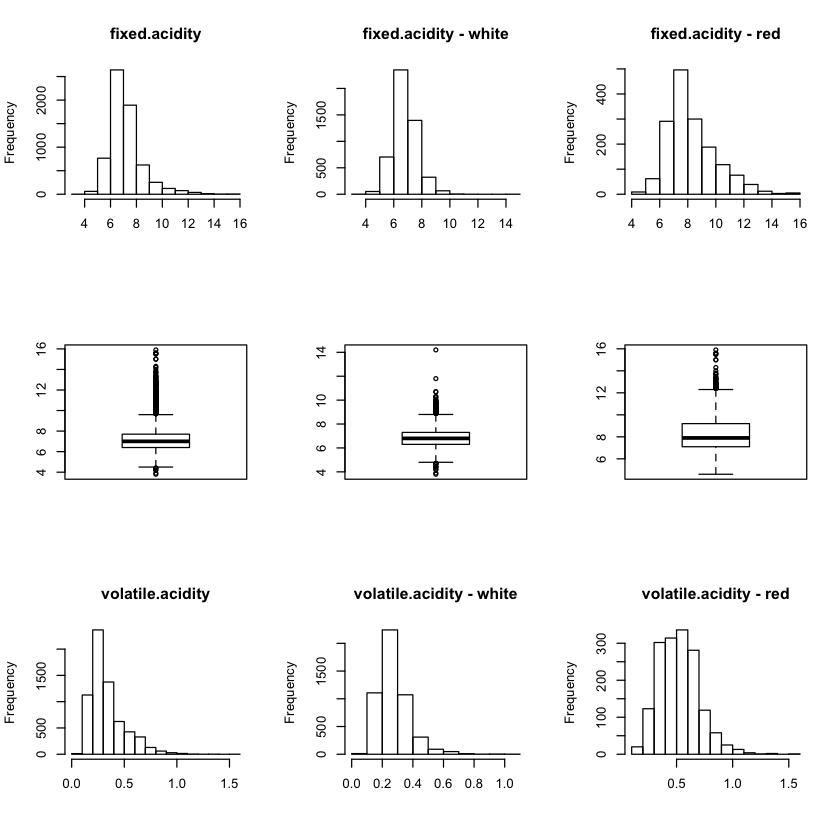

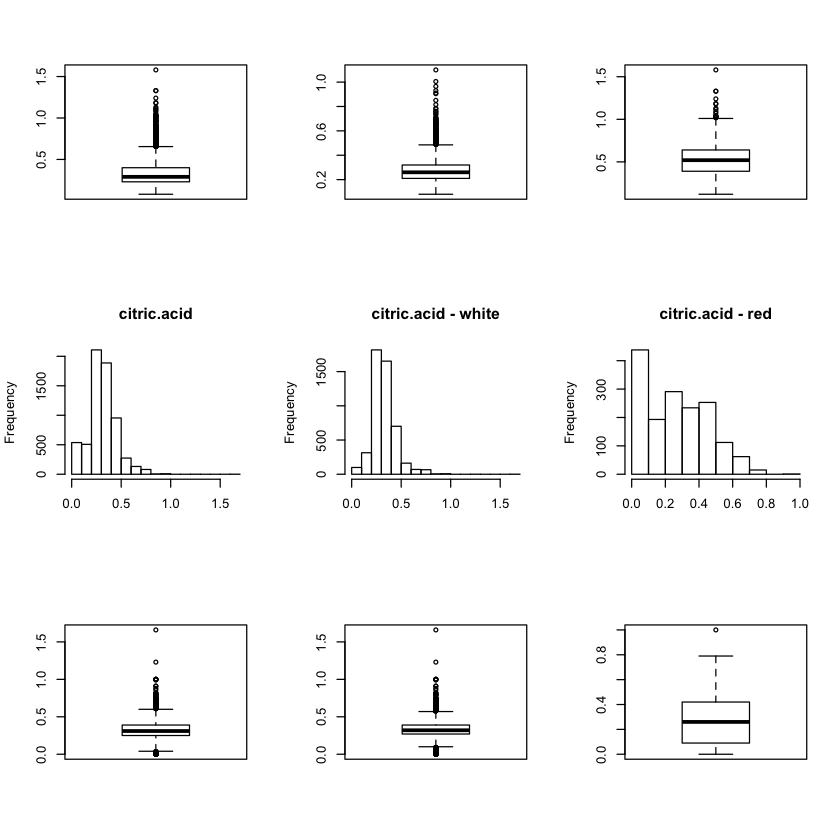

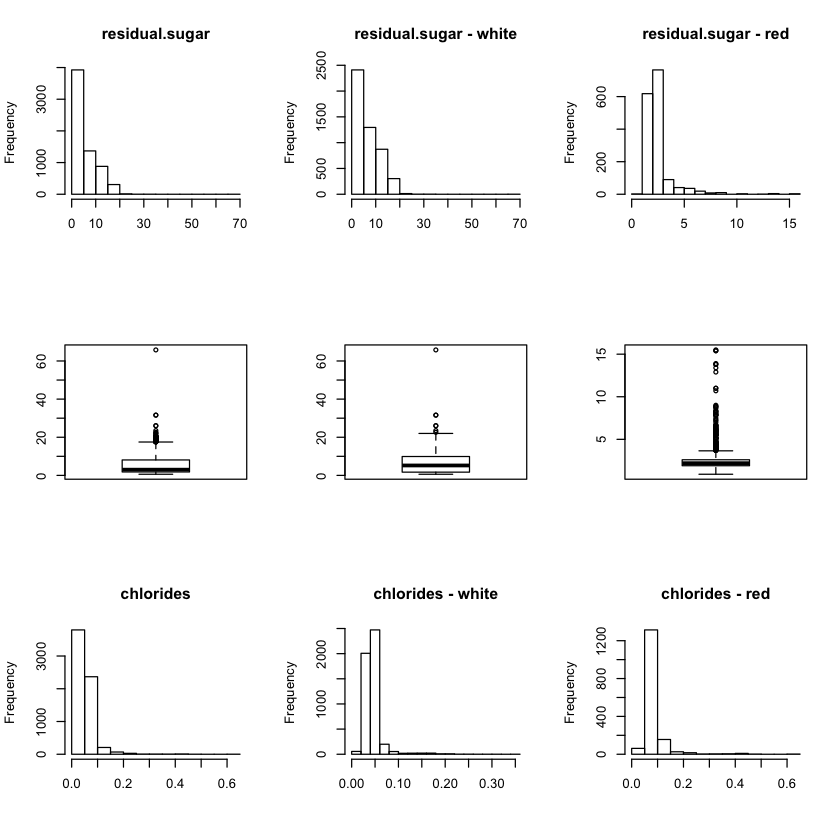

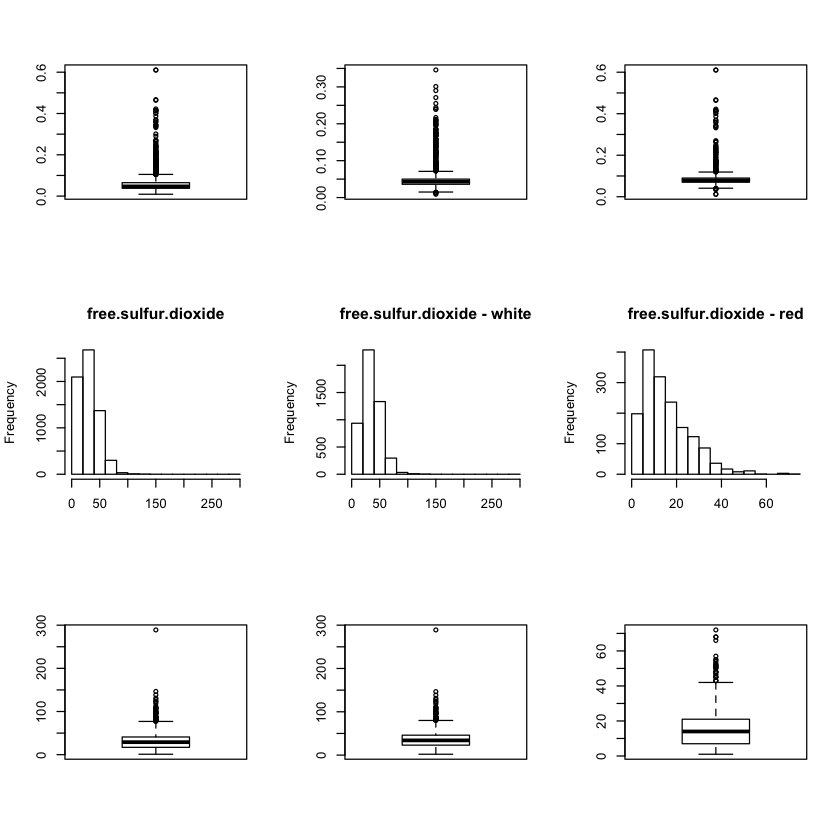

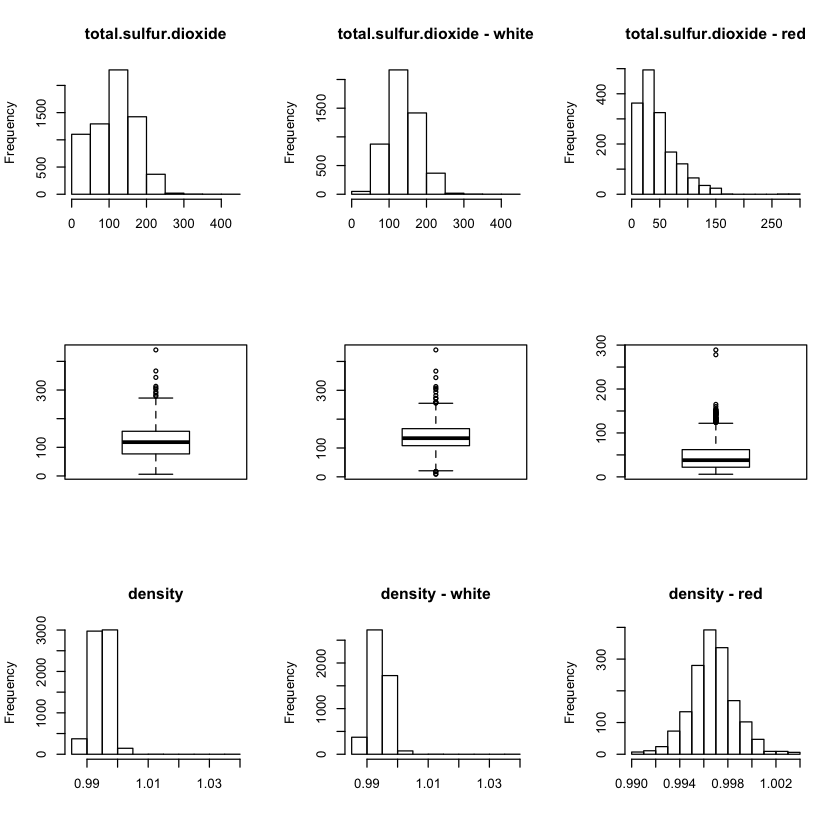

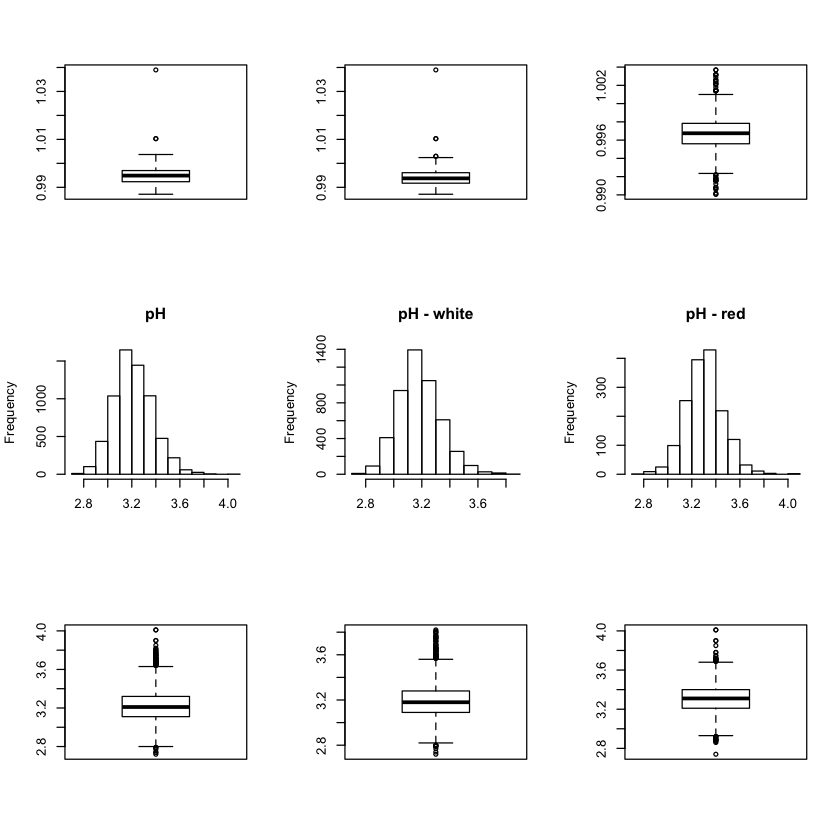

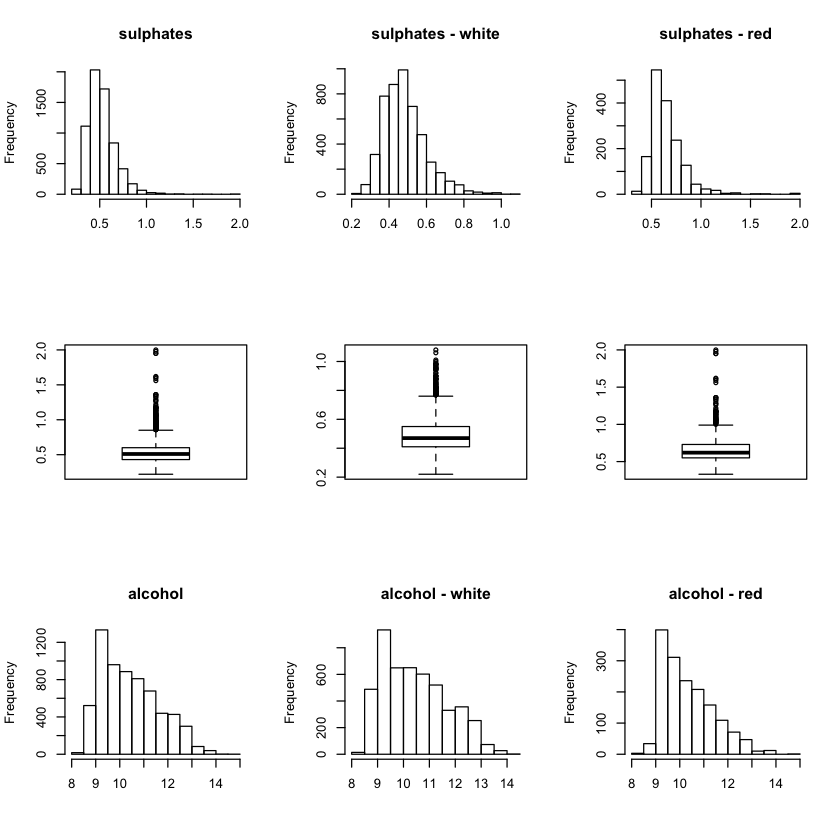

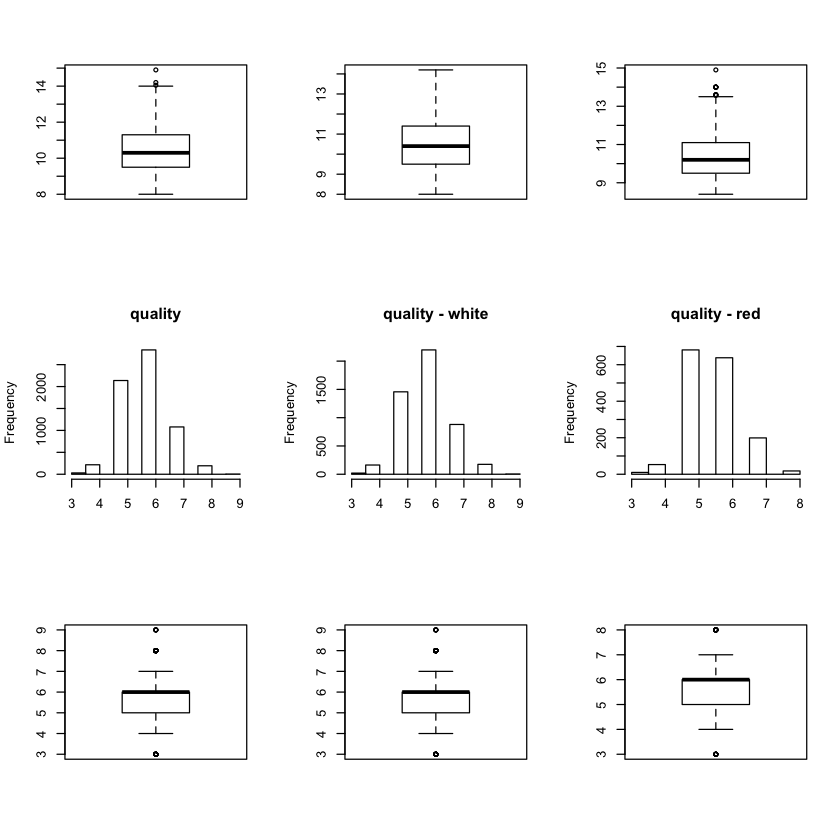

In [6]:
# Código
# Para que no salgan demasiado grandes, se divide el tamaño normal de un gráfico en una matriz de 3 por 3
# Representamos en una fila los histogramas del conjunto completo, solo de blancos y solo de tintos,
# y en la fila siguiente, el boxpolot correspondiente 
par(mfrow=c(3,3))
for (i in seq(3, 14)) {
    hist(wines[,i], xlab="", main=names(wines[i]))
    hist(white_wines[,i], xlab="", main=paste(names(wines[i]),"- white"))
    hist(red_wines[,i], xlab="", main=paste(names(wines[i]),"- red"))
    boxplot(wines[,i])
    boxplot(white_wines[,i])    
    boxplot(red_wines[,i]) 
}


In [7]:
cat ("Número de valores atípicos: \n")
for(i in seq(3, 13)) {
    cat("  Variable:",names(wines[i]), "\n")
    cat("     En total  : ", length(boxplot.stats(wines[,i])$out), "\n")
    cat("     En blancos: ", length(boxplot.stats(white_wines[,i])$out), "\n")
    cat("     En tintos : ", length(boxplot.stats(red_wines[,i])$out), "\n")
}

Número de valores atípicos: 
  Variable: fixed.acidity 
     En total  :  357 
     En blancos:  119 
     En tintos :  49 
  Variable: volatile.acidity 
     En total  :  377 
     En blancos:  186 
     En tintos :  19 
  Variable: citric.acid 
     En total  :  509 
     En blancos:  270 
     En tintos :  1 
  Variable: residual.sugar 
     En total  :  118 
     En blancos:  7 
     En tintos :  155 
  Variable: chlorides 
     En total  :  286 
     En blancos:  208 
     En tintos :  112 
  Variable: free.sulfur.dioxide 
     En total  :  62 
     En blancos:  50 
     En tintos :  30 
  Variable: total.sulfur.dioxide 
     En total  :  10 
     En blancos:  19 
     En tintos :  55 
  Variable: density 
     En total  :  3 
     En blancos:  5 
     En tintos :  45 
  Variable: pH 
     En total  :  73 
     En blancos:  75 
     En tintos :  35 
  Variable: sulphates 
     En total  :  191 
     En blancos:  124 
     En tintos :  59 
  Variable: alcohol 
     En total  :  3 


En los gráficos se ve claramente que los valores de todas las variables son distintas para los vinos blancos y tintos (cambia la media, el rango de valores, etc.)

Excepto el pH (para todos los casos) y la densidad (de los vinos tintos), los histogramas no hacen pensar que las dsitribuciones de las varaibles sean normales.

Como se puede ver en el listado anterior, aparecen muchos valores atípicos. 

Casi todos los valores atípicos son valores altos. Pero hay tantos que no hay un salto brusco entre los últimos valores reguales y los siguientes atípicos.

Hay alguna excepción, como el alcohol, donde hay 13 valores atípicos en los tintos y ninguno en los blancos.

En la tabla anterior se ve fácilmente que la suma de valores atípicos en blancos y tintos no coincide con el número de ellos en el *dataset* completo. Esto se debe a que los valores calculados en el conjunto completo no coinciden con los de los valores de cada subconjunto. Como decíamos antes, las características son distintas para cada tipo de vino.

Los vinos blancos son los que suelen presentar valores atípicos más alejados del resto (por ejemplo en fixed.acidity, citric.acid, residual.sugar). Por ejemplo, en free.sulphur.dioxide solo hay un vino blanco que se aleja mucho del resto de valores.

Por ejemplo, en total.sulfur.dioxide, hay un valor muy separado en los vinos tintos, pero con valor inferior a otros blancos.

Vamos a ver si existe diferencias en los valores atípicos si separamos por calidades. Vamos a representar solo los *boxplot* para cada característica.


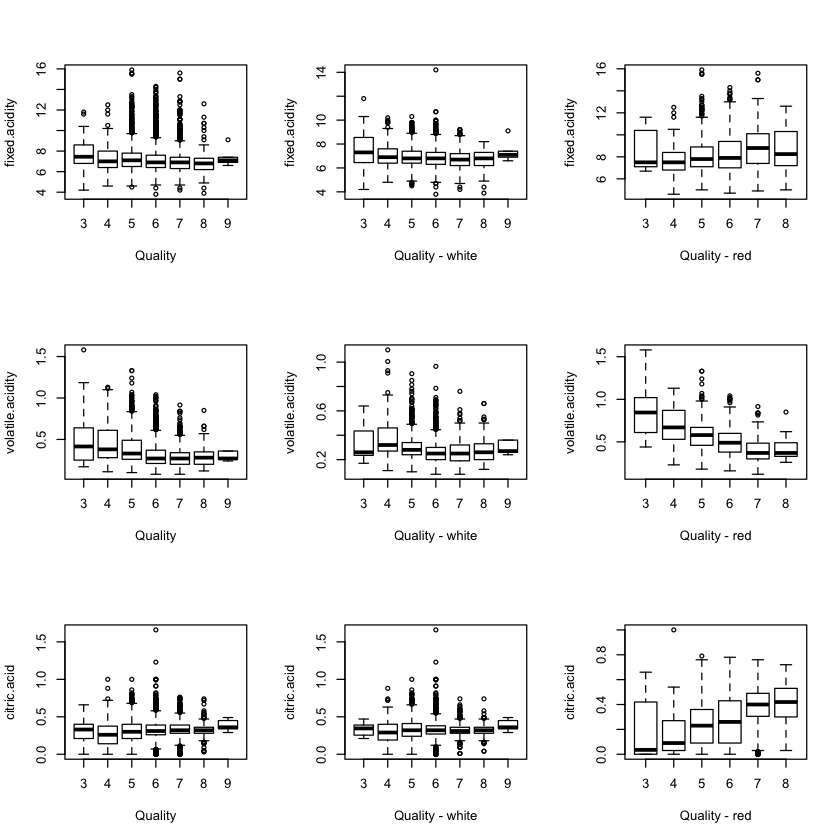

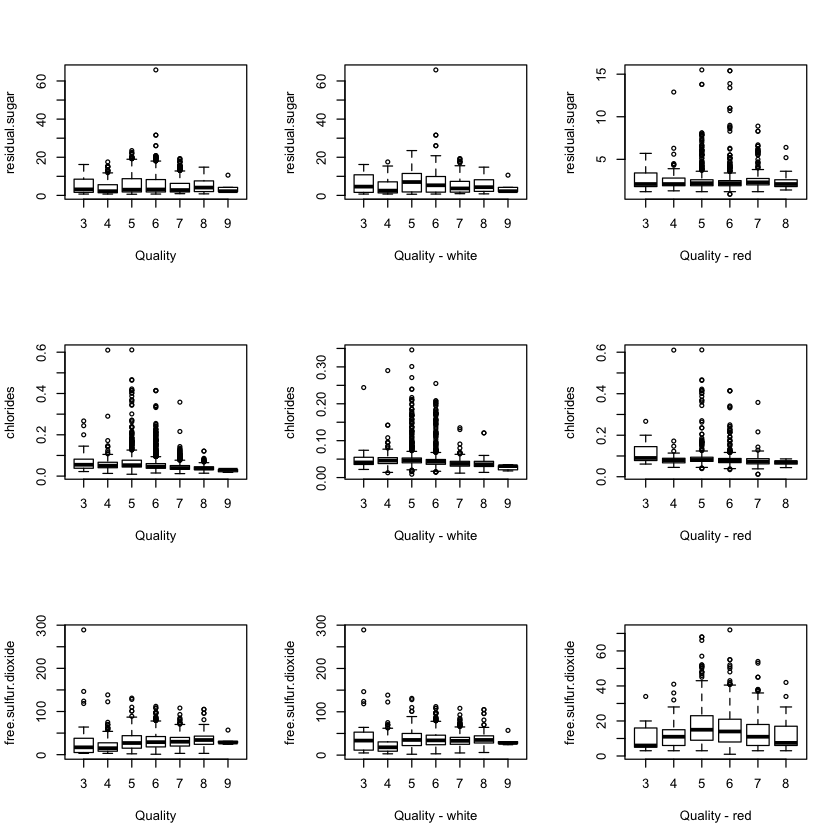

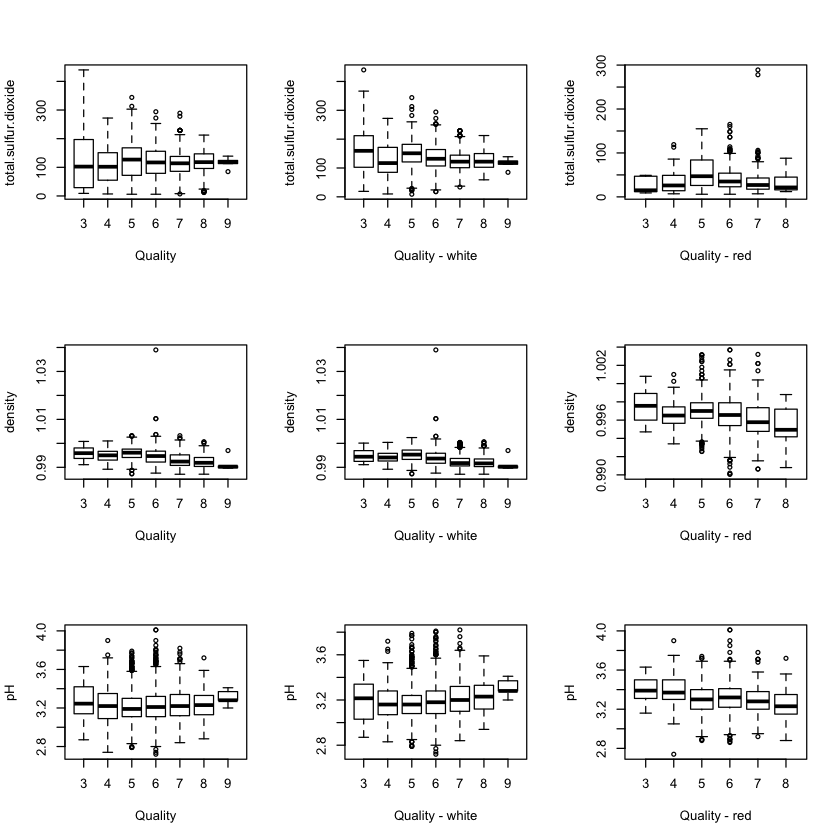

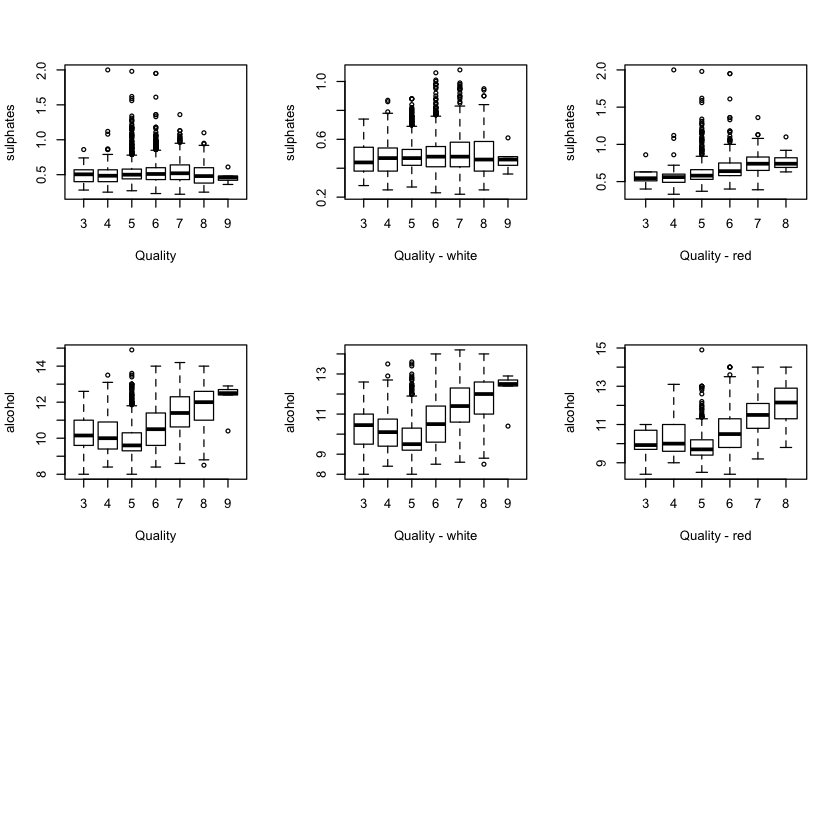

In [8]:
par(mfrow=c(3,3))
for (i in seq(3, 13)) {
   
    boxplot(wines[,i]~wines$quality, xlab = "Quality", ylab=names(wines[i]))
    boxplot(white_wines[,i]~white_wines$quality, xlab = "Quality - white", ylab=names(wines[i]))
    boxplot(red_wines[,i]~red_wines$quality, xlab = "Quality - red", ylab=names(wines[i]))

} 


Se ven más valores extremos en las calidades intermedias, que sabemos que tienen más elementos.  Esos outliers no están relacionados con calidades extremas.

No parece adecuado, por tanto, eliminar los vinos que presenten valores atípicos.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
3.3. Exportación del conjunto de datos
</h3>
<br>
</div>

Vamos a guardar en formato CSV el conjunto de datos completo en el fichero "winequality.csv".

Hay que tener en cuenta que estan ordenados por color primero, y luego según cómo estaban ordenados en los originales

En el fichero CSV generado, los valores están separados por comas, a diferencia de los puntos y comas que separaban los valores en los ficheros originales.

Para comprobar que se exportan bien los datos, se lee de nuevo el fichero y se muestra un resumen de los datos.


In [9]:
# Exportación del conjunto de datos a un .csv

write.table(wines, file = "winequality.csv",col.names=TRUE, row.names=FALSE, sep=",")
vinos_tmp = read.csv("winequality.csv", header = TRUE)
cat("Número de registros, número de campos \n")
dim(vinos_tmp)
summary(vinos_tmp)

Número de registros, número de campos 


[1] 6497   14

       id           colour       fixed.acidity    volatile.acidity
 Min.   :   1   Min.   :0.0000   Min.   : 3.800   Min.   :0.0800  
 1st Qu.:1625   1st Qu.:0.0000   1st Qu.: 6.400   1st Qu.:0.2300  
 Median :3249   Median :0.0000   Median : 7.000   Median :0.2900  
 Mean   :3249   Mean   :0.2461   Mean   : 7.215   Mean   :0.3397  
 3rd Qu.:4873   3rd Qu.:0.0000   3rd Qu.: 7.700   3rd Qu.:0.4000  
 Max.   :6497   Max.   :1.0000   Max.   :15.900   Max.   :1.5800  
  citric.acid     residual.sugar     chlorides       free.sulfur.dioxide
 Min.   :0.0000   Min.   : 0.600   Min.   :0.00900   Min.   :  1.00     
 1st Qu.:0.2500   1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00     
 Median :0.3100   Median : 3.000   Median :0.04700   Median : 29.00     
 Mean   :0.3186   Mean   : 5.443   Mean   :0.05603   Mean   : 30.53     
 3rd Qu.:0.3900   3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00     
 Max.   :1.6600   Max.   :65.800   Max.   :0.61100   Max.   :289.00     
 total.sulfur.dioxid

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
4. Análisis de los datos
</h1>
<br>
</div>


Se va a empezar realizando un análisis descriptivo de los datos del *dataset*, que complete el análisis anterior.

Después, se estudiará la normalidad y homogeneidad de la varianza de las variables.

Posteriormente se analizará la correlación entre las variables y se realizarán algunos modelos de regresión lineal.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
4.1. Análisis descriptivo de los datos
</h3>
<br>
</div>

Para comprender mejor los datos, además de los resúmenes anteriores, vamos a ver, para cada variable:

- un analisis descriptivo (summary),
- la desviación típica, que no aparece en el resumen,
- un *barplot* por categoría

Este análisis lo aplicaremos al conjunto completo y a los *data.frames* de vinos blancos y tintos.

Empezaremos por un *bar plot* para hacernos una idea visual de la cantidad de vinos por categorías.

Todos los vinos 


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

Desviación típica:
fixed.acidity    1.296434 
volatile.acidity    0.1646365 
citric.acid    0.1453179 
residual.sugar    4.757804 
chlorides    0.0350336 
free.sulfur.dioxide    17.7494 
total.sulfur.dioxide    56.52185 
density    0.002998673 
pH    0.1607872 
sulphates    0.1488059 
alcohol    1.192712 
quality    0.8732553 


Frecuencias absolutas por calidad:



   3    4    5    6    7    8    9 
  30  216 2138 2836 1079  193    5 

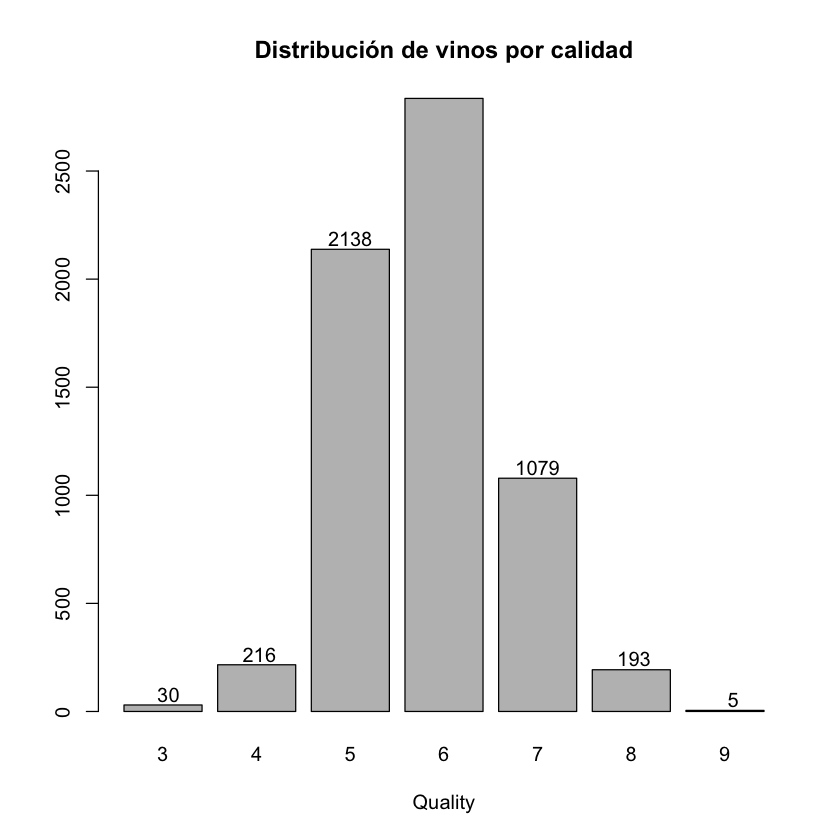

In [10]:
cat("Todos los vinos \n")
summary(wines[,3:14])
cat("Desviación típica:\n")
for (i in 3:14){ 
   cat(names(wines[i]),"  ", sd(wines[,i]), "\n")
}
cat("\n\n")
cat("Frecuencias absolutas por calidad:\n")
table(wines$quality)
bpt = barplot(table(wines$quality), main = "Distribución de vinos por calidad", xlab = "Quality")
text(bpt, table(wines$quality)+50, format(table(wines$quality)))

Vinos blancos 


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

Desviación típica:
fixed.acidity    0.8438682 
volatile.acidity    0.1007945 
citric.acid    0.1210198 
residual.sugar    5.072058 
chlorides    0.02184797 
free.sulfur.dioxide    17.00714 
total.sulfur.dioxide    42.49806 
density    0.002990907 
pH    0.1510006 
sulphates    0.1141258 
alcohol    1.230621 
quality    0.8856386 


Frecuencias absolutas por calidad:



   3    4    5    6    7    8    9 
  20  163 1457 2198  880  175    5 

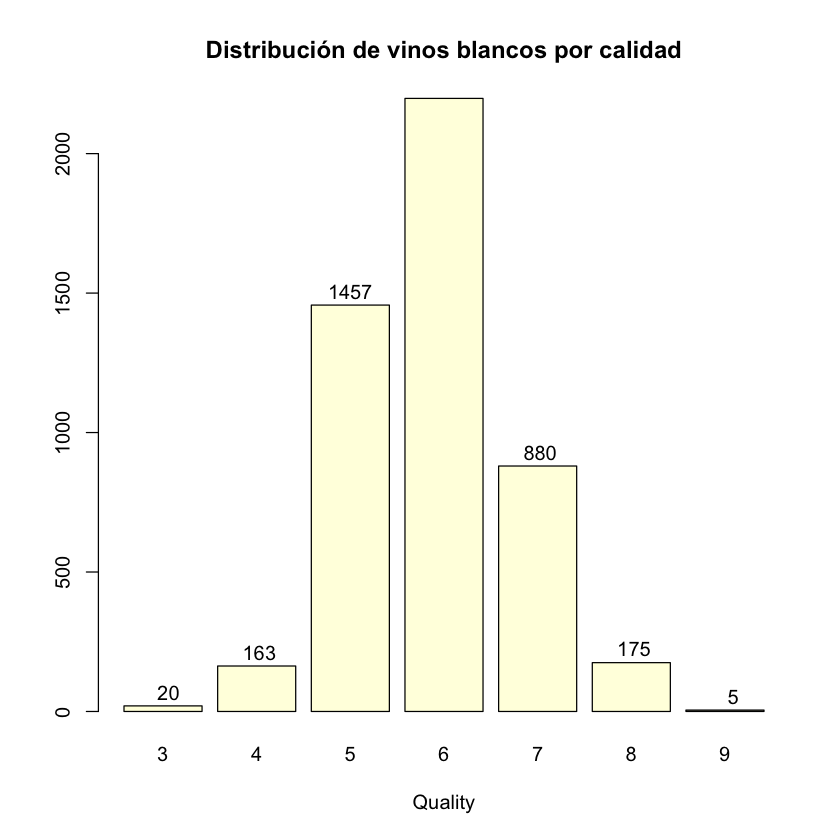

In [11]:
cat("Vinos blancos \n")
summary(white_wines[,3:14])
cat("Desviación típica:\n")
for (i in 3:14){ 
   cat(names(white_wines[i]),"  ", sd(white_wines[,i]), "\n")
}
cat("\n\n")
cat("Frecuencias absolutas por calidad:\n")
table(white_wines$quality)
bpt = barplot(table(white_wines$quality), col = "lightyellow", 
              main = "Distribución de vinos blancos por calidad", xlab = "Quality")
text(bpt, table(white_wines$quality)+50, format(table(white_wines$quality)))

Vinos tintos 


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

Desviación típica:
fixed.acidity    1.741096 
volatile.acidity    0.1790597 
citric.acid    0.1948011 
residual.sugar    1.409928 
chlorides    0.0470653 
free.sulfur.dioxide    10.46016 
total.sulfur.dioxide    32.89532 
density    0.001887334 
pH    0.1543865 
sulphates    0.169507 
alcohol    1.065668 
quality    0.8075694 


Frecuencias absolutas por calidad:



  3   4   5   6   7   8 
 10  53 681 638 199  18 

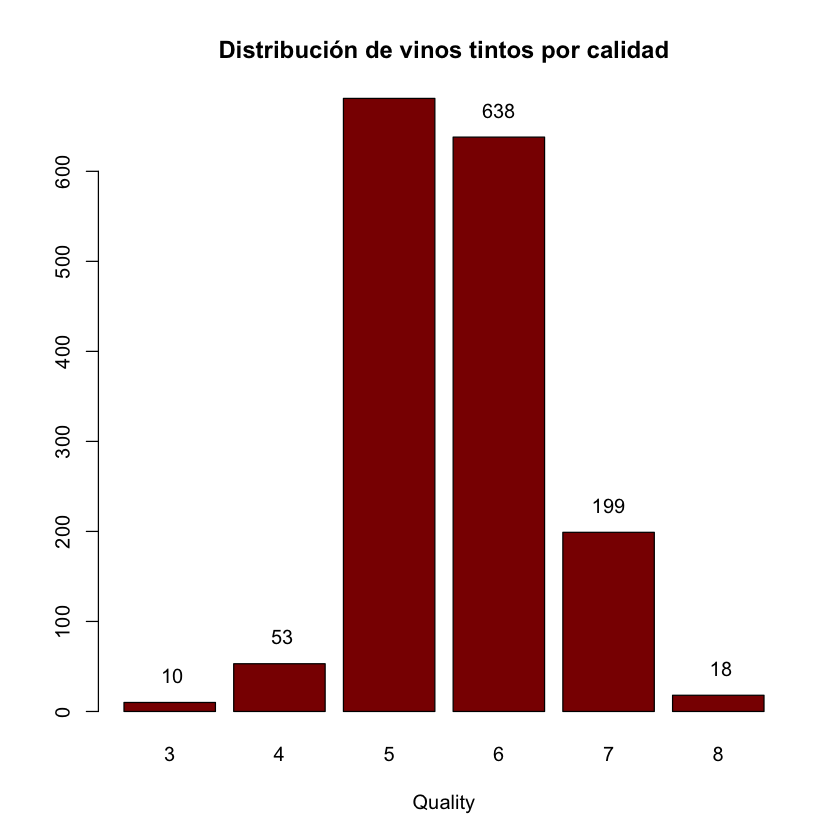

In [12]:
cat("Vinos tintos \n")
summary(red_wines[,3:14])
cat("Desviación típica:\n")
for (i in 3:14){ 
   cat(names(red_wines[i]),"  ", sd(red_wines[,i]), "\n")
}
cat("\n\n")
cat("Frecuencias absolutas por calidad:\n")
table(red_wines$quality)
bpt = barplot(table(red_wines$quality), col = "red4", 
              main = "Distribución de vinos tintos por calidad", xlab = "Quality")
text(bpt, table(red_wines$quality)+30, format(table(red_wines$quality)))

Frecuencias absolutas por calidad y tipo de vino (0: blanco, 1: tinto):


   
       0    1
  3   20   10
  4  163   53
  5 1457  681
  6 2198  638
  7  880  199
  8  175   18
  9    5    0

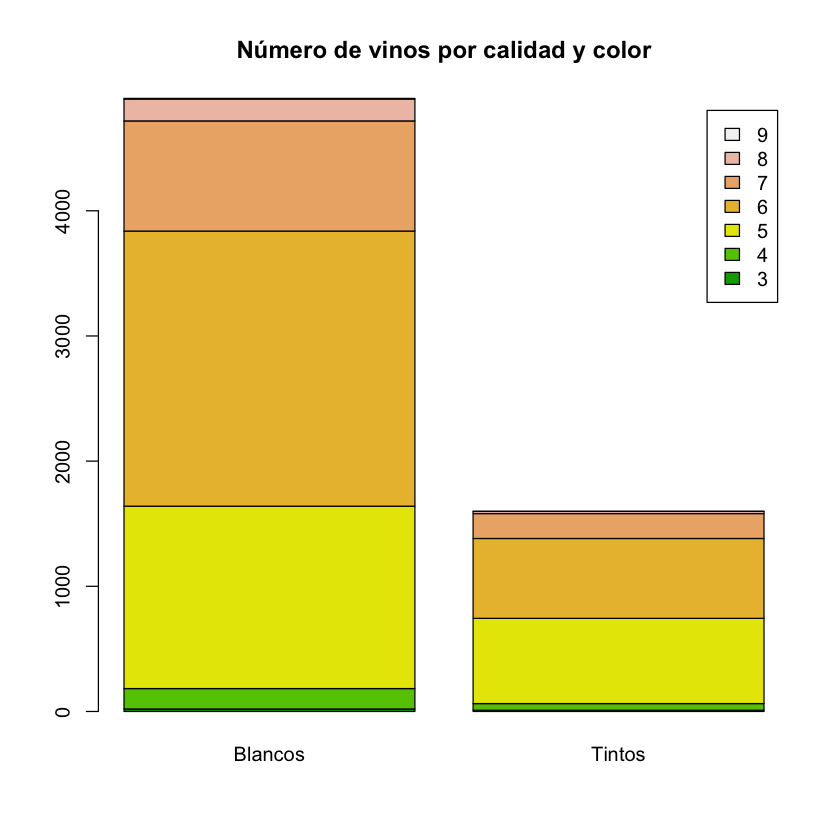

In [13]:
cat("Frecuencias absolutas por calidad y tipo de vino (0: blanco, 1: tinto):\n")
table(wines$quality, wines$colour)

barplot(table(wines$quality, wines$colour), col = terrain.colors(7), beside = FALSE, main = "Número de vinos por calidad y color", names.arg = c("Blancos", "Tintos"), legend = seq(3,9))


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
4.2. Normalidad y homogeneidad de la varianza
</h3>
<br>
</div>

A la vista de los histogramas, no parece que las variables sigan una normal. De todas formas, vamos a realizar el siguiente análisis:
- Representar el gráfico **qqnorm** con cada variable para ver si se aproxima a una normal. Aquí se rerpesentan los cuantiles de la distribución observada con los cuantiles teóricos de una normal con la misma media y desviación típica. Los valores de la normal están representados con una línea roja.
- Aplicar el test de Shapiro-Wilk para determinar la normalidad o no de la distribución.
- Aplicar el test de Lillifors.
- Test de homocedasticidad.

Vamos a hacer este análisis a los dos subconjuntos (vinos blancos y tintos) por separado.


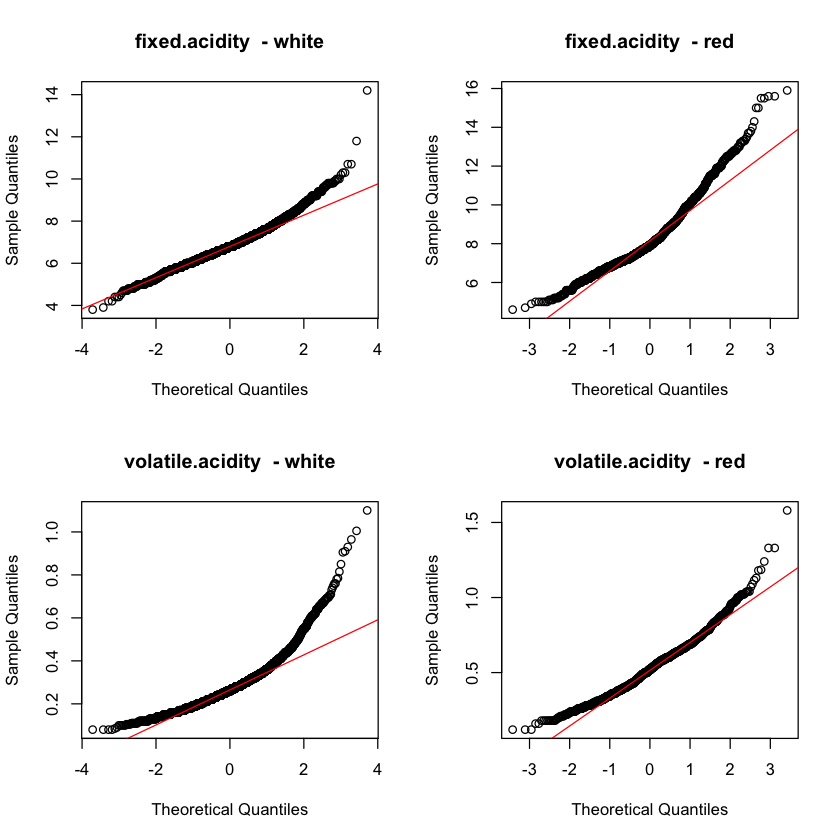

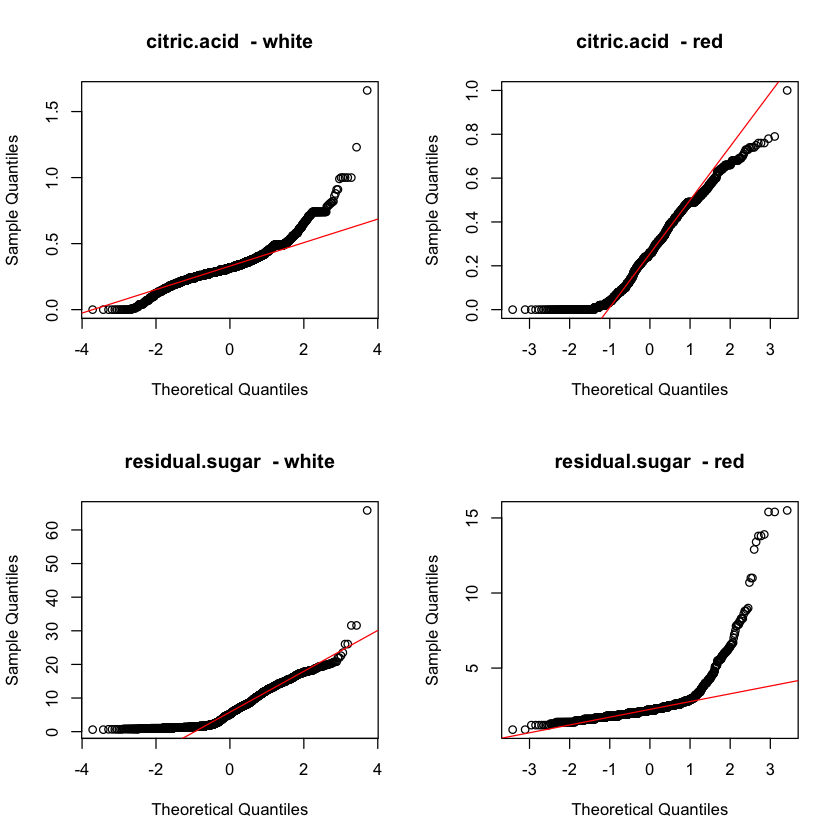

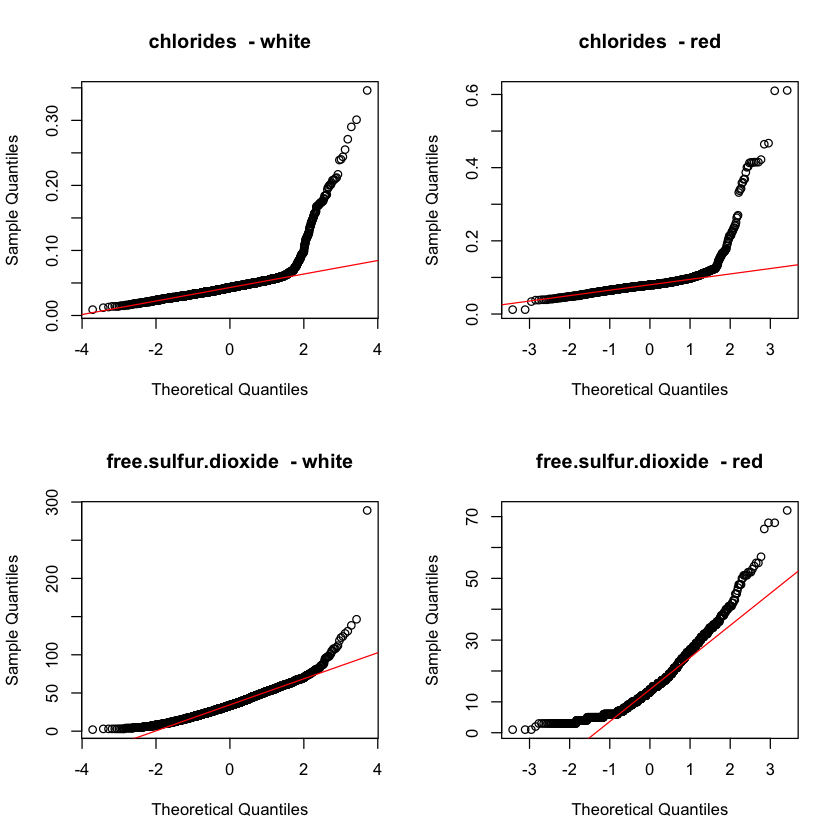

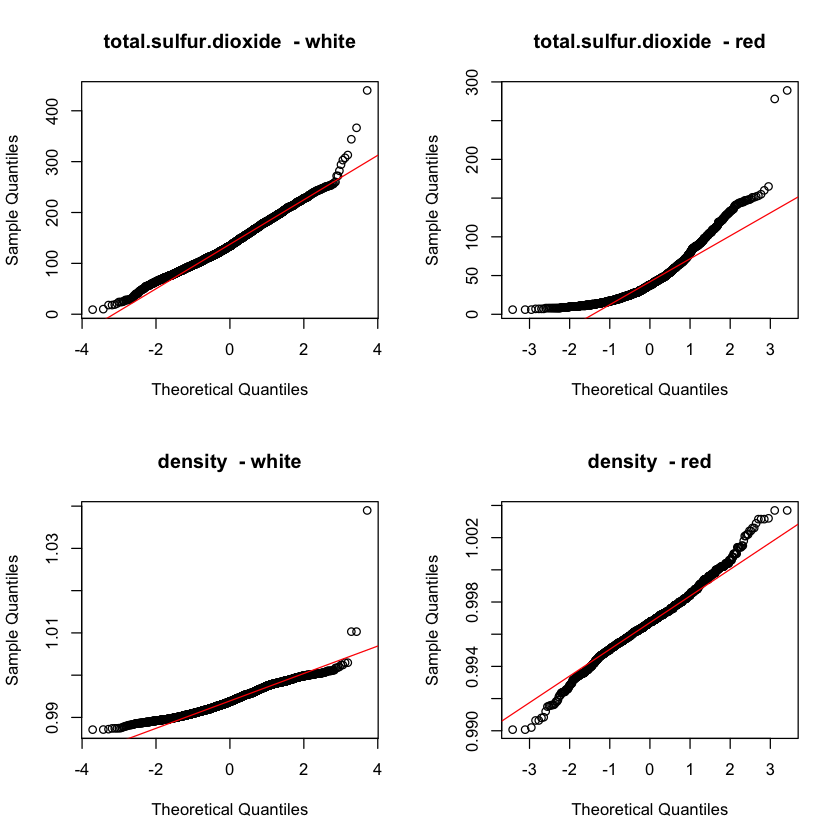

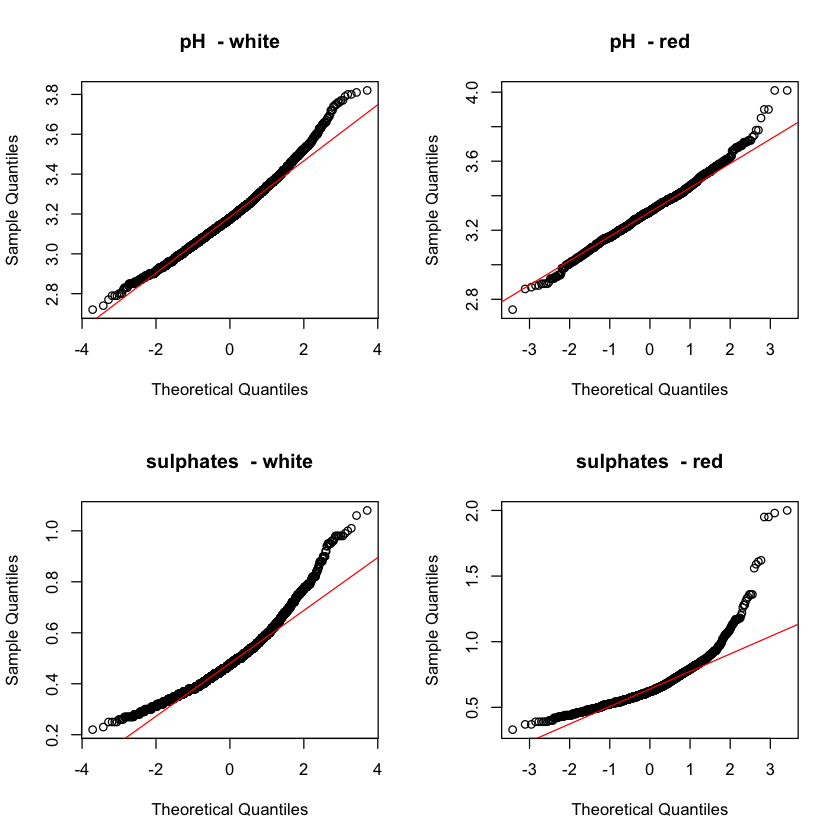

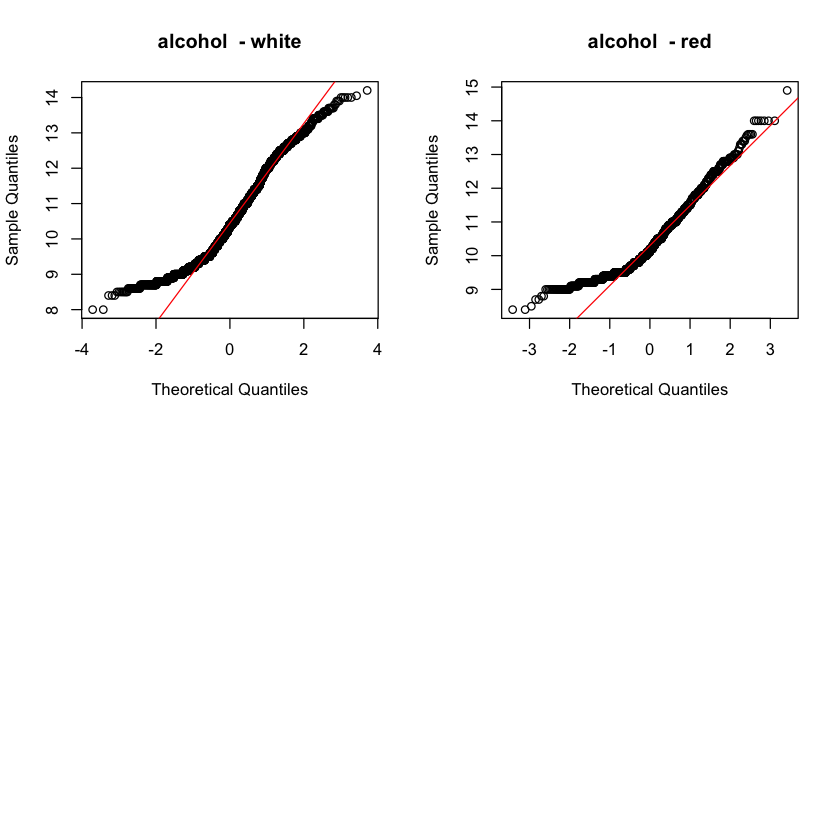

In [14]:
par(mfrow=c(2,2))
for (i in 3:13) {
    qqnorm(white_wines[,i],main = paste(colnames(white_wines)[i], " - white"))
    qqline(white_wines[,i],col="red")
    qqnorm(red_wines[,i],main = paste(colnames(red_wines)[i], " - red"))
    qqline(red_wines[,i],col="red")
}


En los gráficos Q-Q vemos que hay muchos valores intermedios que se ajustan bien a la normal, pero los extremos se separan bastante.

Como los conjuntos de datos son grandes, se pueden considerar que se aproximan a distribuciones normales, aplicando el teorema central del límite.

Aplicamos a continuación el test de Shapiro-Wilkins a las variables para estudiar su normalidad.

Este test está pensado sobre todo para muestras pequeñas. La hipótesis nula es que los valores estén distribuidos siguiente una normal. Si el p-valor es menor que el nivel de significación **alfa**, se rechaza la hipótesis nula y se se concluye que los datos no vienen de una distribución normal). 

Vamos a usar un valor de alfa de 0.05 (95%).


In [15]:
alfa = 0.05

for (i in 3:14) {
    cat("Variable: ", colnames(wines)[i],"\n")
    test = shapiro.test(white_wines[,i])
    cat("   Vinos blancos: \t")
    cat("   W: ", test[["statistic"]], "\t")
    cat("   p-value: ", test[["p.value"]], "\t")
    if (test[["p.value"]] < alfa)
        cat("      Los datos no siguen una normal \n")
    else
        cat("\n")
    test = shapiro.test(red_wines[,i])
    cat("   Vinos tintos: \t")
    cat("   W: ", test[["statistic"]], "\t")
    cat("   p-value: ", test[["p.value"]], "\t")
    if (test[["p.value"]] < alfa)
        cat("      Los datos no siguen una normal \n")
    else
        cat("*** \n")

}

Variable:  fixed.acidity 
   Vinos blancos: 	   W:  0.9765615 	   p-value:  1.150151e-27 	      Los datos no siguen una normal 
   Vinos tintos: 	   W:  0.9420298 	   p-value:  1.525012e-24 	      Los datos no siguen una normal 
Variable:  volatile.acidity 
   Vinos blancos: 	   W:  0.9045497 	   p-value:  4.586797e-48 	      Los datos no siguen una normal 
   Vinos tintos: 	   W:  0.9743369 	   p-value:  2.692935e-16 	      Los datos no siguen una normal 
Variable:  citric.acid 
   Vinos blancos: 	   W:  0.9222473 	   p-value:  1.013179e-44 	      Los datos no siguen una normal 
   Vinos tintos: 	   W:  0.955292 	   p-value:  1.021932e-21 	      Los datos no siguen una normal 
Variable:  residual.sugar 
   Vinos blancos: 	   W:  0.8845686 	   p-value:  2.82071e-51 	      Los datos no siguen una normal 
   Vinos tintos: 	   W:  0.5660771 	   p-value:  1.020162e-52 	      Los datos no siguen una normal 
Variable:  chlorides 
   Vinos blancos: 	   W:  0.5908084 	   p-value:  2.140584e-75

Como vemos, según este test, ninguna de las variables en cada uno de los *datasets* sigue una normal.



Para conjuntos de valores grandes se usa el test de Lillifors, que es una modificación del test de Kolmogorov-Smirnov para contrastar la normalidad cuando no se conoce la media ni la varianza.

Para poder calcular este test debe estár instalada la librería **nortest**.


In [16]:
library("nortest")

for (i in 3:14) {
    cat("Variable: ", colnames(wines)[i],"\n")
    test = lillie.test(white_wines[,i])
    cat("   Vinos blancos: \t")
    cat("   D: ", test[["statistic"]], "\t")
    cat("   p-value: ", test[["p.value"]], "\t")
    if (test[["p.value"]] < alfa)
        cat("      Los datos no siguen una normal \n")
    else
        cat("*** \n")
    test = lillie.test(red_wines[,i])
    cat("   Vinos tintos: \t")
    cat("   D: ", test[["statistic"]], "\t")
    cat("   p-value: ", test[["p.value"]], "\t")
    if (test[["p.value"]] < alfa)
        cat("      Los datos no siguen una normal \n")
    else
        cat("*** \n")

}



Variable:  fixed.acidity 
   Vinos blancos: 	   D:  0.06623227 	   p-value:  4.547108e-57 	      Los datos no siguen una normal 
   Vinos tintos: 	   D:  0.1105032 	   p-value:  6.982456e-53 	      Los datos no siguen una normal 
Variable:  volatile.acidity 
   Vinos blancos: 	   D:  0.1045128 	   p-value:  2.234475e-146 	      Los datos no siguen una normal 
   Vinos tintos: 	   D:  0.05466244 	   p-value:  4.489084e-12 	      Los datos no siguen una normal 
Variable:  citric.acid 
   Vinos blancos: 	   D:  0.1127502 	   p-value:  4.970306e-171 	      Los datos no siguen una normal 
   Vinos tintos: 	   D:  0.08386605 	   p-value:  9.859429e-30 	      Los datos no siguen una normal 
Variable:  residual.sugar 
   Vinos blancos: 	   D:  0.1366236 	   p-value:  2.371586e-253 	      Los datos no siguen una normal 
   Vinos tintos: 	   D:  0.2606766 	   p-value:  3.981712e-309 	      Los datos no siguen una normal 
Variable:  chlorides 
   Vinos blancos: 	   D:  0.2072626 	   p-value:  0 	

Con este test obtenemos el mismo resultado: no siguen una normal ninguna de las variables de los *datasets*.

Vamos a aplicar ahora un test para evaluar la homocedasticidad (la homogeneidad de las varianzas) de todas las variables contraponiendo los grupos de vinos blancos y vinos tintos. 

Usaremos el test de Fligner-Killen. Es un test no paramétrico que compara las varianzas basándose en la mediana y se usa cuando las muestras no cumplen la condición de normalidad.


In [17]:
for (i in 3:14) {
    cat("Variable: ", colnames(wines)[i],"\n")
    test = fligner.test(list(white_wines[,i], red_wines[,i]))
    cat("   med chi-2: ", test[["statistic"]], "\t")
    cat("   p-value: ", test[["p.value"]], "\t")
    if (test[["p.value"]] < alfa)
        cat("      No homogeneidad de las varianzas \n")
    else
        cat("*** \n")
}

Variable:  fixed.acidity 
   med chi-2:  751.5082 	   p-value:  1.885649e-165 	      No homogeneidad de las varianzas 
Variable:  volatile.acidity 
   med chi-2:  852.7903 	   p-value:  1.798635e-187 	      No homogeneidad de las varianzas 
Variable:  citric.acid 
   med chi-2:  839.1307 	   p-value:  1.677256e-184 	      No homogeneidad de las varianzas 
Variable:  residual.sugar 
   med chi-2:  1768.915 	   p-value:  0 	      No homogeneidad de las varianzas 
Variable:  chlorides 
   med chi-2:  200.5291 	   p-value:  1.600938e-45 	      No homogeneidad de las varianzas 
Variable:  free.sulfur.dioxide 
   med chi-2:  348.2164 	   p-value:  1.036427e-77 	      No homogeneidad de las varianzas 
Variable:  total.sulfur.dioxide 
   med chi-2:  198.2962 	   p-value:  4.916348e-45 	      No homogeneidad de las varianzas 
Variable:  density 
   med chi-2:  448.9288 	   p-value:  1.23377e-99 	      No homogeneidad de las varianzas 
Variable:  pH 
   med chi-2:  0.4121955 	   p-value:  0.5208

En este caso, pasan el test e homogeneidad de la varianza el pH y la calidad de los vinos.

(Se han aplicado a calidad también aunque es la variable dependiente.)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
4.3. Correlación entre las variables
</h3>
<br>
</div>

Nos interesa comprobar si hay variables correlacionadas entre sí para ver si se pueden eliminar algunas de ellas y para determinar cuáles influyen más en la calidad

Empezamos por un plot de todos los pares de variables. Representamos todos los vinos (distinguiendo por colores los blancos y los tintos) y luego, por separado, blancos y tintos.


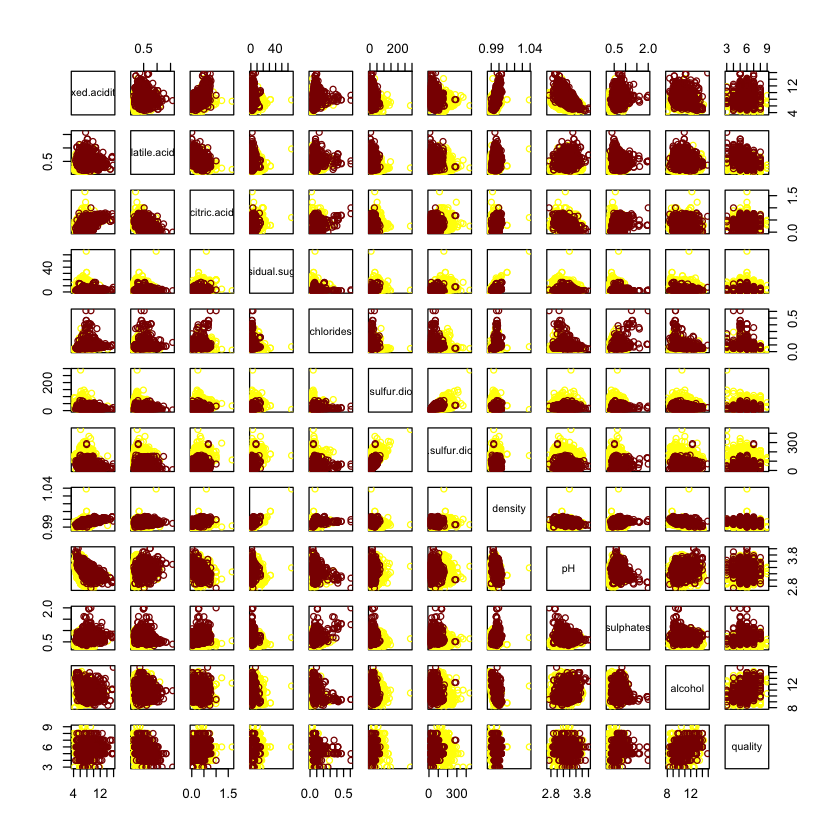

In [18]:
colores = ifelse(wines$colour==0, "yellow", "red4")

plot(wines[3:14],col = colores)


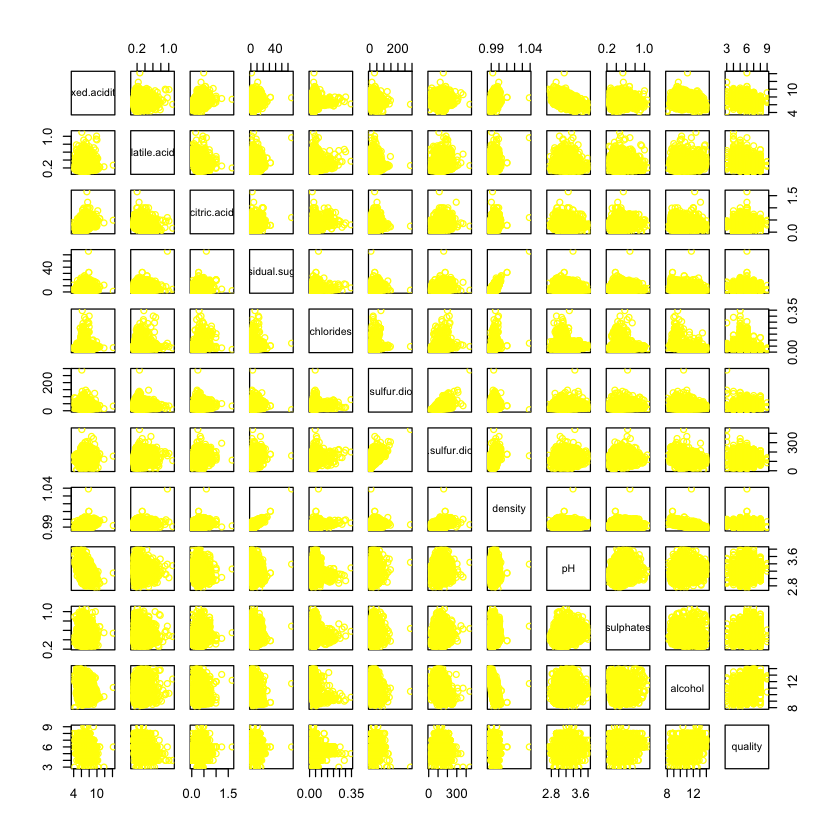

In [19]:
# vinos blancos

plot(white_wines[3:14], col = "yellow")




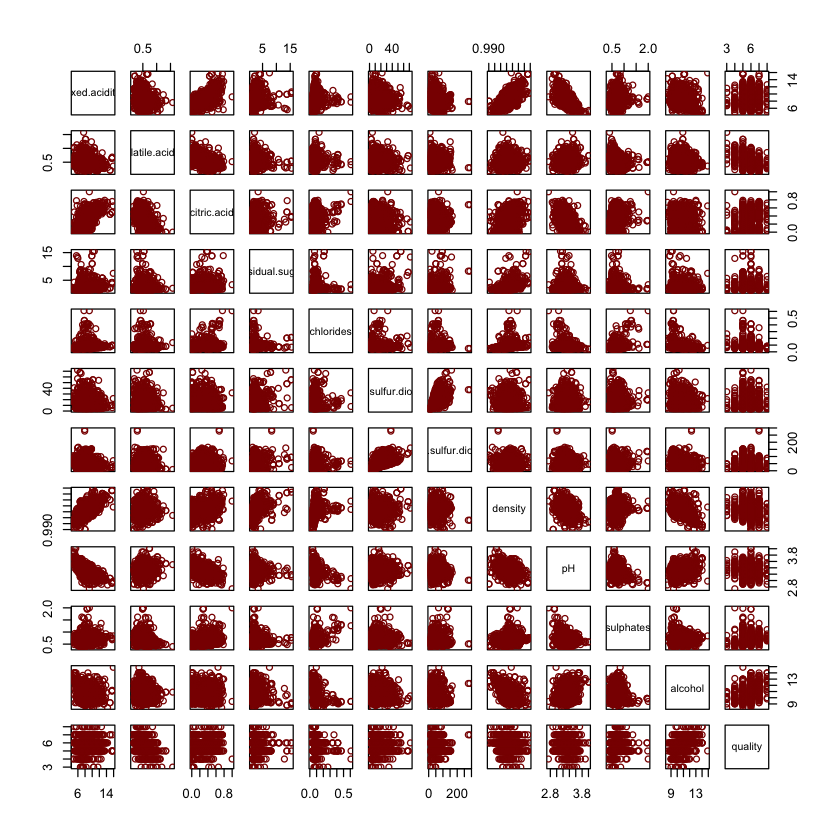

In [20]:
# vinos tintos

plot(red_wines[3:14], col = "red4")

Estas visualizaciones no ayudan demasiado porque son muy pequeñas y no se aprecian los detalles.

Si nos interesara algún plot en concreto, deberíamos representarlo por sepaado.

Sin embargo, no parece que en ningún caso haya un algo índice de correlación.


Vamos a ver los datos con un ***correlogram***, que ayuda a visualizar las matrices de correlación. 

Sobre la diagonal principal se puede ver, mediante un diagrama de tarta, si la correlación es mayor o menor. En la parte inferior, el tono del color indica también la correlación (son dos formas de visualizar la misma información).

Tiene que estar instalada la librería corrgram.

Se hará un correlogram por *dataset*.

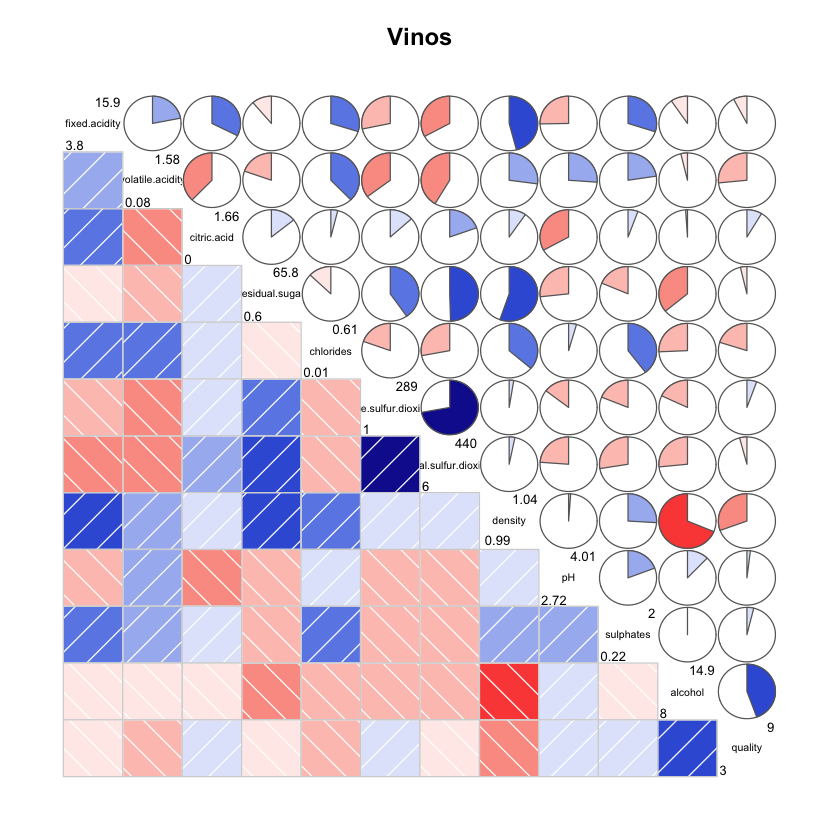

In [21]:
library(corrgram)
corrgram(wines[3:14], order=FALSE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  diag.panel=panel.minmax,
  main="Vinos")

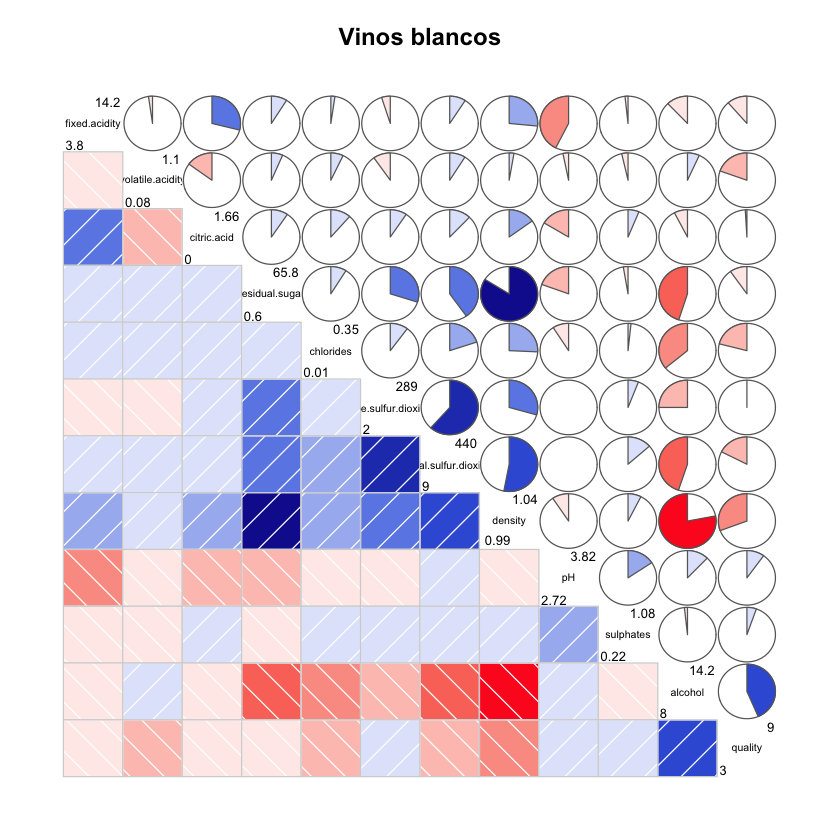

In [22]:
corrgram(white_wines[3:14], order=FALSE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  diag.panel=panel.minmax,
  main="Vinos blancos")

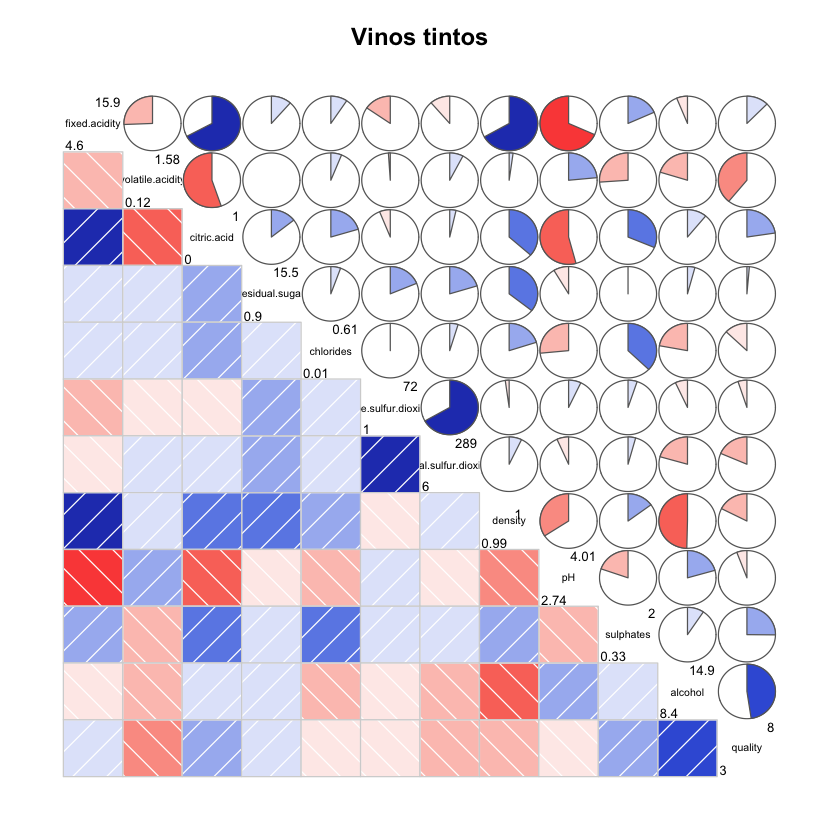

In [23]:
corrgram(red_wines[3:14], order=FALSE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  diag.panel=panel.minmax,
  main="Vinos tintos")

Hay algunas variables correlacionadas, pero no demasiado.

Por ejemplo, con la calidad, solo el porcentaje de alcohol alcanza un valor próximo a la mitad (juntos o separados por clase)

Es alta la correlación positiva entre residual.sugar y density en vinos blancos. Hay correlación negativa entre density y alcohol (menos en los tintos que en los blancos).

'free.sulfur.dioxide' 'total.sulfur.dioxide' están bastante correlacionadas.

En los tintos: 'fixed.acidity'y 'citric.acid', 'fixed.acidity' y 'density' (positiva). Con correlación negativa encontramos 'fixed.acidity' y 'pH', 'volatile.acidity'y 'citric.acid', 'citric.acid'y 'pH'

Este tipo de gráficos proporciona bastante información de un vistazo. (También se puede incluir un plot.)

Vamos a analizar la correlación entre las variables con el coeficiente de correlación de Spearman.

Como las variables que tenemos no siguen distribuciones normales no se debe usar el coeficiente de correlación de Pearson.

Lo aplicaremos al conjunto completo y también separado en blancos y tintos.

En este test no debe haber elementos repetidos, aunque lo puede solucionar internamente y muestra un mensaje de aviso. Se han desactivado en este caso para que la salida sea más clara.

Solo se muestran los resultados del test para aquellos casos en los que el p-value es superior a 0.05 y, por tanto, hay correlación significativa entre las variables.


In [24]:
cat("Conjunto completo de vinos \n")
for (i in 3:13) {
    for (j in (i+1):14) {

        test = cor.test(wines[,i], wines[,j], method="spearman", exact = FALSE)
      
        if (test[["p.value"]] >= alfa) {
            cat(names(wines[i]), " - ", names(wines[j]) )
            print(test)
            cat("     ****** \n")
        }
        
    }
}


Conjunto completo de vinos 
volatile.acidity  -  alcohol
	Spearman's rank correlation rho

data:  wines[, i] and wines[, j]
S = 4.6801e+10, p-value = 0.05382
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0239242 

     ****** 
citric.acid  -  alcohol
	Spearman's rank correlation rho

data:  wines[, i] and wines[, j]
S = 4.4809e+10, p-value = 0.1132
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01965297 

     ****** 
residual.sugar  -  quality
	Spearman's rank correlation rho

data:  wines[, i] and wines[, j]
S = 4.648e+10, p-value = 0.1734
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01689059 

     ****** 
free.sulfur.dioxide  -  density
	Spearman's rank correlation rho

data:  wines[, i] and wines[, j]
S = 4.5441e+10, p-value = 0.6379
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.005840651 

     ****** 
density  -  pH
	Spearman's r

In [25]:
Según los resultados del test,  la correlación de las siguientes variables es significativa:
volatile.acidity  -  alcohol
citric.acid  -  alcohol
residual.sugar  -  quality
free.sulfur.dioxide  -  density
density  -  pH
sulphates  -  alcohol

Sin embargo, los valores de rho son bastante bajos en todos los casos, muy alejados de los valores -1 o 1.

Vamos a ver los resultados con los conjuntos de datos separados (blancos y tintos).


ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: Según los
          ^


In [ ]:
cat("Conjunto de vinos blancos \n")
for (i in 3:13) {
    for (j in (i+1):14) {

        test = cor.test(white_wines[,i], white_wines[,j], method="spearman", exact = FALSE)
      
        if (test[["p.value"]] >= alfa) {                       
            print(test)
            cat(names(white_wines[i]), " - ", names(white_wines[j]) , "\n")
 
        }
        
    }
}


En este *dataset* hay 11 pares de variables cuya correlación es significativa, pero con valores muy bajos, próximos a 0, que indican que no están correlacionados.

In [26]:
for (i in 3:13) {
    for (j in (i+1):14) {

        test = cor.test(red_wines[,i], red_wines[,j], method="spearman", exact = FALSE)
      
        if (test[["p.value"]] >= alfa) {
            cat(names(red_wines[i]), " - ", names(red_wines[j]), "\n" )
            print(test)
  
        }
        
    }
}


volatile.acidity  -  residual.sugar 

	Spearman's rank correlation rho

data:  red_wines[, i] and red_wines[, j]
S = 659320000, p-value = 0.1955
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0323856 

volatile.acidity  -  free.sulfur.dioxide 

	Spearman's rank correlation rho

data:  red_wines[, i] and red_wines[, j]
S = 666970000, p-value = 0.3977
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02116264 

volatile.acidity  -  density 

	Spearman's rank correlation rho

data:  red_wines[, i] and red_wines[, j]
S = 664340000, p-value = 0.3175
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02501412 

citric.acid  -  total.sulfur.dioxide 

	Spearman's rank correlation rho

data:  red_wines[, i] and red_wines[, j]
S = 674980000, p-value = 0.7072
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.009399602 

residual.sugar  -  sulphates 

	Spearman's ra

El el conjunto de vinos tintos hay 13 pares de variables cuyos valores de correlación son significativos estadísticamente, pero con valores muy bajos, cercanos a 0, lo que indica que son variables poco correlacionadas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h3>
4.4. Modelo de regresión lineal
<br>
</div>

Vamos a proponer algunos modelos de regresión lineal para intentar explicar la calidad de un vino a partir de algunos subconjuntos de características químicas.

En el siguiente artículo se indican 6 criterios que determinan la calidad del vino:
http://www.vinopack.es/criterios-que-determinan-la-calidad-en-el-vino

De los seis, en nuestro *dataset* se incluyen cuatro: densidad, alcohol, ph, acidez volatil. No hay información sobre el color (no blanco o tinto, sino otros matices) o el hierro presente.

Vamos a ver si existe un modelo de regresión lineal para explicar la calidad a partir de esas 4 características.

Se hace la prueba para el conjunto de vinos tintos.


In [27]:
fit = lm(red_wines$quality ~ red_wines$density + red_wines$alcohol + red_wines$pH 
         + red_wines$volatile.acidity, data=redwines)
summary(fit) 





Call:
lm(formula = red_wines$quality ~ red_wines$density + red_wines$alcohol + 
    red_wines$pH + red_wines$volatile.acidity, data = redwines)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.56329 -0.39869 -0.07628  0.45888  2.23283 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -8.12905   10.75099  -0.756  0.44969    
red_wines$density          12.21377   10.58512   1.154  0.24873    
red_wines$alcohol           0.33962    0.01854  18.314  < 2e-16 ***
red_wines$pH               -0.38495    0.11939  -3.224  0.00129 ** 
red_wines$volatile.acidity -1.27742    0.09911 -12.889  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6652 on 1594 degrees of freedom
Multiple R-squared:  0.3233,	Adjusted R-squared:  0.3216 
F-statistic: 190.4 on 4 and 1594 DF,  p-value: < 2.2e-16


Podemos ver que los resultados del ajuste no es bueno y que no es significativo estadísticamente.

Si probamos ahora con el vino blanco y con el conjunto de vinos, obtenemos los mismos resultados.

In [28]:
fit = lm(white_wines$quality ~ white_wines$density + white_wines$alcohol + white_wines$pH 
         + white_wines$volatile.acidity, data=whitewines)
summary(fit)


Call:
lm(formula = white_wines$quality ~ white_wines$density + white_wines$alcohol + 
    white_wines$pH + white_wines$volatile.acidity, data = whitewines)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4056 -0.4870 -0.0434  0.4841  3.0322 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -37.04119    5.99835  -6.175 7.14e-10 ***
white_wines$density           38.86584    5.91549   6.570 5.55e-11 ***
white_wines$alcohol            0.39530    0.01445  27.349  < 2e-16 ***
white_wines$pH                 0.22014    0.07330   3.003  0.00268 ** 
white_wines$volatile.acidity  -2.05852    0.11016 -18.687  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7682 on 4893 degrees of freedom
Multiple R-squared:  0.2483,	Adjusted R-squared:  0.2477 
F-statistic:   404 on 4 and 4893 DF,  p-value: < 2.2e-16


In [29]:

fit = lm(wines$quality ~ wines$density + wines$alcohol + wines$pH + wines$volatile.acidity, data=wines)
summary(fit) 




Call:
lm(formula = wines$quality ~ wines$density + wines$alcohol + 
    wines$pH + wines$volatile.acidity, data = wines)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4363 -0.4765 -0.0389  0.4723  3.0274 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -35.03370    4.57019  -7.666 2.04e-14 ***
wines$density           37.05778    4.52401   8.191 3.08e-16 ***
wines$alcohol            0.37860    0.01104  34.308  < 2e-16 ***
wines$pH                 0.16747    0.06036   2.774  0.00555 ** 
wines$volatile.acidity  -1.53195    0.06168 -24.838  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7473 on 6492 degrees of freedom
Multiple R-squared:  0.2682,	Adjusted R-squared:  0.2677 
F-statistic: 594.7 on 4 and 6492 DF,  p-value: < 2.2e-16


Vamos a intentar otro modelo con dos características (azucar y pH) sobre el conjunto de los vinos tintos.


In [30]:
fit = lm(redwines$quality ~ redwines$residual.sugar + redwines$pH, data = redwines)
summary(fit)  


Call:
lm(formula = redwines$quality ~ redwines$residual.sugar + redwines$pH, 
    data = redwines)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6788 -0.6401  0.3027  0.3902  2.4886 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              6.60992    0.43949  15.040   <2e-16 ***
redwines$residual.sugar  0.00507    0.01437   0.353   0.7242    
redwines$pH             -0.29802    0.13119  -2.272   0.0232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8067 on 1596 degrees of freedom
Multiple R-squared:  0.003411,	Adjusted R-squared:  0.002162 
F-statistic: 2.731 on 2 and 1596 DF,  p-value: 0.06546


Aunque el p-valor es superior a 0.05, el ajuste proporcionado es muy bajo.

Parece claro que, en el caso que nos ocupa, estas variables no presentan un ajuste lineal.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
5. Representación de resultados
</h1>
<br>
</div>

Las representaciones gráficas se han ido haciendo a lo largo de los puntos anteriores.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
6. Conclusiones
</h1>
<br>
</div>

- Los conjuntos de datos de partida estaban bien preparados y no ha habido que realizar trabajos de limpieza y preparación complejos.

- Aunque hay muchos valores atípicos, no se han eliminado porque pueden representar valores posibles.

- En general, las características analizadas no seguían distribuciones normales, ni se ha visto correlación significativas entre ellas.

- Hay demasiadas medias y creo que no he conseguido determinar aquellas de las que podíamos prescindir por no servir para explicar la calidad del vino.

- Sería interesante usar este *dataset* para intentar realizar predicciones de la calidad del vino con árboles de regresión o redes neuronales, por ejemplo. 


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<h1>
Referencias
</h1>
<br>
</div>


- Dataset (vinos tintos): https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
- Dataset completo: https://archive.ics.uci.edu/ml/datasets/wine+quality

- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

- Dalgaard, Peter. Introductory statistics with R (Second Edition). New York : Springer, 2002. ISBN 038722632X

- https://www.statmethods.net/advgraphs/correlograms.html


